<a href="https://colab.research.google.com/github/Hjjooo/-/blob/main/%EC%82%B0%EC%97%85%EB%B6%84%EC%84%9D_%EC%9E%AC%EB%AC%B4%EC%A0%9C%ED%91%9C_%EA%B0%80%EC%A4%91%EC%B9%98(%EC%B5%9C%EC%A2%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,656 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and dire

In [1]:
import pandas as pd

# CSV 파일 불러오기
data = pd.read_csv('kospi_200_financial_statements_상세.csv', encoding = 'UTF-8')
print(data.columns)
# 결측값 개수 확인
print(data.isnull().sum())
# 결측값 비율 확인
print(data.isnull().mean())
# 데이터 타입 확인
print(data.dtypes)

Index(['rcept_no', 'reprt_code', 'bsns_year', 'corp_code', 'sj_div', 'sj_nm',
       'Unnamed: 6', 'account_nm', 'account_detail', 'thstrm_nm',
       'thstrm_amount', 'frmtrm_nm', 'frmtrm_amount', 'ord', 'currency',
       'thstrm_add_amount', 'frmtrm_q_nm', 'frmtrm_q_amount',
       'frmtrm_add_amount', 'corp_name', 'bfefrmtrm_nm', 'bfefrmtrm_amount'],
      dtype='object')
rcept_no                  0
reprt_code                0
bsns_year                 0
corp_code                 0
sj_div                    0
sj_nm                     0
Unnamed: 6           659601
account_nm                0
account_detail            0
thstrm_nm                 0
thstrm_amount         25643
frmtrm_nm            378566
frmtrm_amount        389368
ord                       0
currency                  0
thstrm_add_amount    581137
frmtrm_q_nm          283407
frmtrm_q_amount      300256
frmtrm_add_amount    581425
corp_name                 0
bfefrmtrm_nm         508820
bfefrmtrm_amount     520024
dtype

In [2]:
# 필요 없는 컬럼 삭제
columns_to_drop = ['Unnamed: 6', 'account_detail', 'currency',
                   'ord', 'frmtrm_q_nm', 'frmtrm_q_amount']

# 데이터프레임에서 컬럼 삭제
data = data.drop(columns=columns_to_drop)

# 삭제된 후 데이터 확인
print(data.head())


         rcept_no  reprt_code  bsns_year  corp_code sj_div  sj_nm account_nm  \
0  20200515000867       11013       2020     164788     BS  재무상태표       유동자산   
1  20200515000867       11013       2020     164788     BS  재무상태표   현금및현금성자산   
2  20200515000867       11013       2020     164788     BS  재무상태표     기타금융자산   
3  20200515000867       11013       2020     164788     BS  재무상태표  매출채권및기타채권   
4  20200515000867       11013       2020     164788     BS  재무상태표       재고자산   

     thstrm_nm  thstrm_amount frmtrm_nm  frmtrm_amount  thstrm_add_amount  \
0  제 44 기 1분기말   2.146290e+13   제 43 기말   2.150460e+13                NaN   
1  제 44 기 1분기말   3.764100e+12   제 43 기말   3.341980e+12                NaN   
2  제 44 기 1분기말   7.467020e+12   제 43 기말   7.769130e+12                NaN   
3  제 44 기 1분기말   6.616970e+12   제 43 기말   7.125380e+12                NaN   
4  제 44 기 1분기말   3.302920e+12   제 43 기말   3.034170e+12                NaN   

   frmtrm_add_amount corp_name bfefrmtrm_nm  bfefrmtrm_a

In [3]:
# sj_div의 고유 값 확인
print(data['sj_div'].unique())



['BS' 'IS' 'CIS' 'CF' 'SCE']


BS: 안정성 지표 분석 (부채비율, 유동비율 등).

IS: 수익성 지표 분석 (영업이익률, 순이익률 등).

CIS: 기타포괄손익의 영향을 포함한 종합적인 수익성 분석.

CF: 현금 유동성과 자금 흐름 분석.

SCE: 자본 효율성과 주주 관련 분석 (배당 정책, 자본금 변화).

1. 안정성 지표

* 부채비율 (Debt-to-Equity Ratio)

공식: 총부채 / 자기자본 × 100

의미: 기업의 자기자본 대비 부채 수준을 보여줌. 낮을수록 안정적.

* 유동비율 (Current Ratio)

공식: 유동자산 / 유동부채 × 100

의미: 단기 채무를 상환할 수 있는 능력을 보여줌. 100% 이상이 바람직.

* 자기자본비율 (Equity Ratio)

공식: 자기자본 / 총자산 × 100

의미: 기업 자산 중 자기자본이 차지하는 비율. 높을수록 안정적.

2. 수익성 지표

* ROE (Return on Equity)

공식: 당기순이익 / 자기자본 × 100

의미: 자기자본 대비 순이익 창출 능력. 높을수록 수익성 우수.

* 영업이익률 (Operating Profit Margin)

공식: 영업이익 / 매출액 × 100

의미: 매출액 대비 영업이익의 비율. 본업에서의 수익성 판단.


In [4]:
# sj_div 별 account_nm 고유 값 확인
for sj in data['sj_div'].unique():
    print(f"===== {sj} ({'BS' if sj == 'BS' else ''}{'IS' if sj == 'IS' else ''}{'CIS' if sj == 'CIS' else ''}{'CF' if sj == 'CF' else ''}{'SCE' if sj == 'SCE' else ''}) =====")
    print(data[data['sj_div'] == sj]['account_nm'].unique())
    print("\n")


===== BS (BS) =====
['유동자산' '현금및현금성자산' '기타금융자산' ... '만기보유유가증권' '지배기업 소유주자본' '유동사채']


===== IS (IS) =====
['매출액' '매출원가' '매출총이익' '판매비와관리비' '영업이익' '기타수익' '기타비용' '금융수익' '금융비용'
 '관계기업및공동기업투자관련이익' '법인세비용차감전순이익' '법인세비용' '분기순이익' '지배기업소유주지분 순이익'
 '비지배지분 순이익(손실)' '기본주당이익' '반기순이익' '비지배지분 순이익' '관계기업및공동기업투자관련이익(손실)'
 '당기순이익' '관계기업및공동기업투자주식관련이익' '기본주당이익(손실)' '지배기업소유주지분순이익' '법인세차감전순이익'
 '분기순이익 (손실)' '반기순이익 (손실)' '기타영업외수익' '기타영업외비용' '지분법이익' '지배기업의 소유주'
 '기본주당순이익' '희석주당순이익' '희석주당이익' '매출총이익(손실)' '영업이익(손실)' '법인세비용차감전순이익(손실)'
 '분기순이익(손실)' '희석주당이익(손실)' '지분법이익(손실)' '법인세비용(수익)' '당기순이익(손실)' '비지배지분'
 '법인세수익' '반기순이익(손실)' '기본주당순이익(손실)' '희석주당순이익(손실)' '영업손실' '법인세비용차감전순손실'
 '수익(매출액)' '연구개발비' '지배기업의 소유주에게 귀속되는 당기순이익(손실)' '비지배지분에 귀속되는 당기순이익(손실)'
 '관계기업 및 공동기업투자 관련 손익' '기본주당손익(손실)-계속' '희석주당이익(손실)-계속' '영업비용' '광고선전비'
 '지급수수료' '운송비' '상품및기타구입비용' '기타영업비용' '감가상각비' '종업원급여비용' '분기연결순이익(손실)'
 '지배기업의 소유주지분' '계속영업이익(손실)' '중단영업이익(손실)' '영업수익' '지분법손익' '지분법손실'
 '기본주당이익(손실) - 계속' '희석주당이익(손실) - 계속' '종업원급여' '종속기업,관계기업 및 공동기업투자관련이익(손실)'

In [5]:
# 데이터 확인 및 처리
data['account_nm'] = data['account_nm'].fillna('').astype(str)

# (손실)이 포함된 경우 처리 함수
def handle_loss(row):
    # 'account_nm'이 문자열로 변환되었으므로 안전하게 체크 가능
    if '(손실)' in row['account_nm']:
        return -abs(row['thstrm_amount'])
    return row['thstrm_amount']

# 함수 적용
data['thstrm_amount'] = data.apply(handle_loss, axis=1)

# 결과 확인
print(data.head())


         rcept_no  reprt_code  bsns_year  corp_code sj_div  sj_nm account_nm  \
0  20200515000867       11013       2020     164788     BS  재무상태표       유동자산   
1  20200515000867       11013       2020     164788     BS  재무상태표   현금및현금성자산   
2  20200515000867       11013       2020     164788     BS  재무상태표     기타금융자산   
3  20200515000867       11013       2020     164788     BS  재무상태표  매출채권및기타채권   
4  20200515000867       11013       2020     164788     BS  재무상태표       재고자산   

     thstrm_nm  thstrm_amount frmtrm_nm  frmtrm_amount  thstrm_add_amount  \
0  제 44 기 1분기말   2.146290e+13   제 43 기말   2.150460e+13                NaN   
1  제 44 기 1분기말   3.764100e+12   제 43 기말   3.341980e+12                NaN   
2  제 44 기 1분기말   7.467020e+12   제 43 기말   7.769130e+12                NaN   
3  제 44 기 1분기말   6.616970e+12   제 43 기말   7.125380e+12                NaN   
4  제 44 기 1분기말   3.302920e+12   제 43 기말   3.034170e+12                NaN   

   frmtrm_add_amount corp_name bfefrmtrm_nm  bfefrmtrm_a

In [6]:
import numpy as np

# 계정명 변경 함수 정의
def clean_account_nm(row):
    # 명확히 매출액으로 처리할 조건
    if row['account_nm'] in ['수익(매출액)','I. 매출', '매출', '매출 및 지분법 손익']:
        return '매출액'
    elif '매출총이익' in row['account_nm']:
        return '매출총이익'
    # 영업이익 통일
    elif '영업이익' in row['account_nm']:
        return '영업이익'
    # 법인세비용차감전순이익 통일
    elif '법인세비용차감전순이익' in row['account_nm']:
        return '법인세비용차감전순이익'
    # 당기순이익, 분기순이익, 반기순이익 통일
    elif '당기순이익' in row['account_nm'] or '분기순이익' in row['account_nm'] or '반기순이익' in row['account_nm']:
        return '당기순이익'
    # 해당되지 않으면 기존 값 유지
    return row['account_nm']

# 계정명 정리
data['account_nm'] = data.apply(clean_account_nm, axis=1)

# 결과 확인
print(data['account_nm'].unique())


['유동자산' '현금및현금성자산' '기타금융자산' ... '영업양도에 따른 현금 유입' '당기손익-공정가치측정금융자산 감소'
 '당기손익-공정가치측정금융자산 증가']


2. 지표 계산에 필요한 계정

(1) 수익성 지표

지표	계산식	필요한 계정명

ROE	당기순이익 ÷ 자기자본 × 100	"당기순이익", "자본총계"

영업이익률	영업이익 ÷ 매출액 × 100	"영업이익", "매출액"

순이익률	당기순이익 ÷ 매출액 × 100	"당기순이익", "매출액"

매출총이익률	매출총이익 ÷ 매출액 × 100	"매출총이익", "매출액"

(2) 안정성 지표

지표	계산식	필요한 계정명

부채비율	부채총계 ÷ 자본총계 × 100	"부채총계", "자본총계"

유동비율	유동자산 ÷ 유동부채 × 100	"유동자산", "유동부채"

고정비율	비유동자산 ÷ 자본총계 × 100	"비유동자산", "자본총계"



In [7]:
# 주요 계정 정의
important_accounts = [
    "유동자산", "비유동자산", "자산총계", "유동부채", "비유동부채", "부채총계", "자본총계",
    "매출액", "매출총이익", "매출원가", "영업이익", "당기순이익"
]

# 필터링
filtered_data = data[data['account_nm'].isin(important_accounts)]

# 결과 확인
print(filtered_data.head())


          rcept_no  reprt_code  bsns_year  corp_code sj_div  sj_nm account_nm  \
0   20200515000867       11013       2020     164788     BS  재무상태표       유동자산   
6   20200515000867       11013       2020     164788     BS  재무상태표      비유동자산   
15  20200515000867       11013       2020     164788     BS  재무상태표       자산총계   
16  20200515000867       11013       2020     164788     BS  재무상태표       유동부채   
23  20200515000867       11013       2020     164788     BS  재무상태표      비유동부채   

      thstrm_nm  thstrm_amount frmtrm_nm  frmtrm_amount  thstrm_add_amount  \
0   제 44 기 1분기말   2.146290e+13   제 43 기말   2.150460e+13                NaN   
6   제 44 기 1분기말   2.565110e+13   제 43 기말   2.510140e+13                NaN   
15  제 44 기 1분기말   4.711400e+13   제 43 기말   4.660610e+13                NaN   
16  제 44 기 1분기말   9.169840e+12   제 43 기말   8.962270e+12                NaN   
23  제 44 기 1분기말   5.317760e+12   제 43 기말   5.234170e+12                NaN   

    frmtrm_add_amount corp_name bfefrmtrm_nm

In [8]:
# rcept_no를 문자열로 변환
filtered_data['rcept_no'] = filtered_data['rcept_no'].astype(str)

# 공시 날짜 추출
filtered_data['공시날짜'] = filtered_data['rcept_no'].str[:8]  # rcept_no의 왼쪽 8자리 추출

# rcept_no 컬럼 삭제
filtered_data.drop(columns=['rcept_no'], inplace=True)

# 결과 확인
print(filtered_data.head())


    reprt_code  bsns_year  corp_code sj_div  sj_nm account_nm    thstrm_nm  \
0        11013       2020     164788     BS  재무상태표       유동자산  제 44 기 1분기말   
6        11013       2020     164788     BS  재무상태표      비유동자산  제 44 기 1분기말   
15       11013       2020     164788     BS  재무상태표       자산총계  제 44 기 1분기말   
16       11013       2020     164788     BS  재무상태표       유동부채  제 44 기 1분기말   
23       11013       2020     164788     BS  재무상태표      비유동부채  제 44 기 1분기말   

    thstrm_amount frmtrm_nm  frmtrm_amount  thstrm_add_amount  \
0    2.146290e+13   제 43 기말   2.150460e+13                NaN   
6    2.565110e+13   제 43 기말   2.510140e+13                NaN   
15   4.711400e+13   제 43 기말   4.660610e+13                NaN   
16   9.169840e+12   제 43 기말   8.962270e+12                NaN   
23   5.317760e+12   제 43 기말   5.234170e+12                NaN   

    frmtrm_add_amount corp_name bfefrmtrm_nm  bfefrmtrm_amount      공시날짜  
0                 NaN     현대모비스          NaN               NaN  2

<ipython-input-8-68d7c9a9f4ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['rcept_no'] = filtered_data['rcept_no'].astype(str)
<ipython-input-8-68d7c9a9f4ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['공시날짜'] = filtered_data['rcept_no'].str[:8]  # rcept_no의 왼쪽 8자리 추출
<ipython-input-8-68d7c9a9f4ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [9]:
# merged_kospi_200_corp_list 파일 읽어오기
merged_kospi_200_corp_list = pd.read_csv('merged_kospi_200_corp_list.csv')

# corp_code를 기준으로 industry 및 stock_code 컬럼 추가 (병합)
filtered_data = filtered_data.merge(
    merged_kospi_200_corp_list[['corp_code', 'industry', 'stock_code']],  # 필요한 컬럼 선택
    how='left',  # 왼쪽 기준 병합 (filtered_data 기준)
    on='corp_code'  # 병합 기준 열
)

# 결과 확인
print(filtered_data.head())


   reprt_code  bsns_year  corp_code sj_div  sj_nm account_nm    thstrm_nm  \
0       11013       2020     164788     BS  재무상태표       유동자산  제 44 기 1분기말   
1       11013       2020     164788     BS  재무상태표      비유동자산  제 44 기 1분기말   
2       11013       2020     164788     BS  재무상태표       자산총계  제 44 기 1분기말   
3       11013       2020     164788     BS  재무상태표       유동부채  제 44 기 1분기말   
4       11013       2020     164788     BS  재무상태표      비유동부채  제 44 기 1분기말   

   thstrm_amount frmtrm_nm  frmtrm_amount  thstrm_add_amount  \
0   2.146290e+13   제 43 기말   2.150460e+13                NaN   
1   2.565110e+13   제 43 기말   2.510140e+13                NaN   
2   4.711400e+13   제 43 기말   4.660610e+13                NaN   
3   9.169840e+12   제 43 기말   8.962270e+12                NaN   
4   5.317760e+12   제 43 기말   5.234170e+12                NaN   

   frmtrm_add_amount corp_name bfefrmtrm_nm  bfefrmtrm_amount      공시날짜  \
0                NaN     현대모비스          NaN               NaN  20200515   
1 

In [10]:
# 분기 정보 추출
def extract_quarter(thstrm_nm):
    if '1분기' in thstrm_nm:
        return '1분기'
    elif '반기' in thstrm_nm:
        return '2분기'
    elif '3분기' in thstrm_nm:
        return '3분기'
    else:
        return '4분기'  # 사업보고서로 간주

# 새로운 컬럼 생성
filtered_data['당기_분기'] = filtered_data['thstrm_nm'].apply(extract_quarter)

# 결과 확인
print(filtered_data[['thstrm_nm', '당기_분기']].head())


     thstrm_nm 당기_분기
0  제 44 기 1분기말   1분기
1  제 44 기 1분기말   1분기
2  제 44 기 1분기말   1분기
3  제 44 기 1분기말   1분기
4  제 44 기 1분기말   1분기


In [11]:
# 연도 추가
filtered_data['당기_연도'] = filtered_data['bsns_year']

# 연도와 분기를 결합하여 시계열 컬럼 생성
filtered_data['시계열'] = filtered_data['당기_연도'].astype(str) + '-' + filtered_data['당기_분기']

# 확인
print(filtered_data[['당기_연도', '당기_분기', '시계열']].head())

   당기_연도 당기_분기       시계열
0   2020   1분기  2020-1분기
1   2020   1분기  2020-1분기
2   2020   1분기  2020-1분기
3   2020   1분기  2020-1분기
4   2020   1분기  2020-1분기


In [12]:
import pandas as pd
import numpy as np

# 피벗 테이블 생성
financial_pivot = filtered_data.pivot_table(
    index=['industry','corp_name', 'stock_code', '공시날짜','시계열'],  # 기업명, 종목 코드, 날짜를 인덱스로 설정
    columns='account_nm',                       # account_nm의 각 항목을 열로 설정
    values='thstrm_amount',                     # 값으로 사용할 열
    aggfunc='first'                             # 첫 번째 값 사용
).reset_index()

# 열 이름을 깔끔하게 만듦
financial_pivot.columns.name = None

# 숫자형으로 변환해야 할 열들
numeric_columns = ['매출액', '영업이익', '부채총계', '자산총계', '당기순이익', '자본총계', '매출총이익', '유동자산', '유동부채', '비유동자산']

# 콤마와 공백을 제거하고 숫자형으로 변환 (변환할 수 없는 값은 NaN으로 처리)
for column in numeric_columns:
    if column in financial_pivot.columns:
        financial_pivot[column] = financial_pivot[column].replace({',': '', ' ': ''}, regex=True)  # 콤마와 공백 제거
        financial_pivot[column] = pd.to_numeric(financial_pivot[column], errors='coerce')  # 숫자로 변환

# 파생 변수 생성 - 수익성 지표
financial_pivot['ROE'] = (financial_pivot['당기순이익'] / financial_pivot['자본총계']) * 100
financial_pivot['영업이익률'] = (financial_pivot['영업이익'] / financial_pivot['매출액']) * 100
financial_pivot['순이익률'] = (financial_pivot['당기순이익'] / financial_pivot['매출액']) * 100
financial_pivot['매출총이익률'] = (financial_pivot['매출총이익'] / financial_pivot['매출액']) * 100

# 파생 변수 생성 - 안정성 지표
financial_pivot['부채비율'] = (financial_pivot['부채총계'] / financial_pivot['자본총계']) * 100
financial_pivot['유동비율'] = (financial_pivot['유동자산'] / financial_pivot['유동부채']) * 100
financial_pivot['고정비율'] = (financial_pivot['비유동자산'] / financial_pivot['자본총계']) * 100

# 파생 변수 생성 - 증감률 지표
financial_pivot['매출액_증감률'] = financial_pivot.groupby(['corp_name', 'stock_code'])['매출액'].pct_change() * 100
financial_pivot['영업이익_증감률'] = financial_pivot.groupby(['corp_name', 'stock_code'])['영업이익'].pct_change() * 100


# 결측값 처리 (초기 값은 NaN이므로 0으로 대체)
financial_pivot.fillna(0, inplace=True)

# 결측값 처리
financial_pivot = financial_pivot.fillna(0)

# 결과 저장을 위한 필요한 열만 선택
output_columns = [
    'industry','corp_name', 'stock_code', '공시날짜', '시계열',
    'ROE', '영업이익률', '순이익률', '매출총이익률',
    '부채비율', '유동비율', '고정비율','매출액_증감률', '영업이익_증감률'
]
result_data = financial_pivot[output_columns]

# 결과 확인
print(result_data.head())


  industry corp_name  stock_code      공시날짜       시계열        ROE      영업이익률  \
0      건설업     DL이앤씨      375500  20210514  2021-1분기   4.341439  11.753461   
1      건설업     DL이앤씨      375500  20210812  2021-2분기   2.790978  11.912585   
2      건설업     DL이앤씨      375500  20211112  2021-3분기   4.748832  14.331968   
3      건설업     DL이앤씨      375500  20220316  2021-4분기  14.138643  12.543264   
4      건설업     DL이앤씨      375500  20220516  2022-1분기   2.263849   8.301491   

        순이익률     매출총이익률        부채비율        유동비율       고정비율     매출액_증감률  \
0  10.271239  18.860915  103.554304  159.139060  68.010017    0.000000   
1   6.018769  16.871749  100.289229  171.575877  74.695694   13.103594   
2  11.410837  18.401871   87.440084  187.234328  71.840903   -6.009405   
3   8.331567  18.166058   93.493435  170.697922  74.432474  322.384879   
4   6.784597  15.391882   89.405604  177.108194  73.506962  -80.151868   

     영업이익_증감률  
0    0.000000  
1   14.634842  
2   13.079590  
3  269.669048  
4  -86

<ipython-input-12-d45c1eee087a>:36: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  financial_pivot['매출액_증감률'] = financial_pivot.groupby(['corp_name', 'stock_code'])['매출액'].pct_change() * 100
<ipython-input-12-d45c1eee087a>:37: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  financial_pivot['영업이익_증감률'] = financial_pivot.groupby(['corp_name', 'stock_code'])['영업이익'].pct_change() * 100


In [13]:
result_data

,industry,corp_name,stock_code,공시날짜,시계열,ROE,영업이익률,순이익률,매출총이익률,부채비율,유동비율,고정비율,매출액_증감률,영업이익_증감률
0,건설업,DL이앤씨,375500,20210514,2021-1분기,4.341439,11.753461,10.271239,18.860915,103.554304,159.139060,68.010017,0.000000,0.000000
1,건설업,DL이앤씨,375500,20210812,2021-2분기,2.790978,11.912585,6.018769,16.871749,100.289229,171.575877,74.695694,13.103594,14.634842
2,건설업,DL이앤씨,375500,20211112,2021-3분기,4.748832,14.331968,11.410837,18.401871,87.440084,187.234328,71.840903,-6.009405,13.079590
3,건설업,DL이앤씨,375500,20220316,2021-4분기,14.138643,12.543264,8.331567,18.166058,93.493435,170.697922,74.432474,322.384879,269.669048
4,건설업,DL이앤씨,375500,20220516,2022-1분기,2.263849,8.301491,6.784597,15.391882,89.405604,177.108194,73.506962,-80.151868,-86.863938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,화학,후성,93370,20231114,2023-3분기,-2.238146,-5.300918,-7.040532,6.486487,130.592767,74.420149,165.888047,-11.532638,117.231366
3364,화학,후성,93370,20240321,2023-4분기,-25.459962,-8.812397,-16.130242,2.879697,157.452258,76.205261,180.371074,322.365022,602.151623
3365,화학,후성,93370,20240516,2024-1분기,-2.823322,-8.678835,-8.405345,6.076990,161.971116,71.353932,189.594342,-79.248345,-79.562861
3366,화학,후성,93370,20240814,2024-2분기,-2.649093,-3.791039,-9.850742,17.144915,123.378936,95.822583,150.294324,3.091986,-54.967946


In [28]:
# 피벗 테이블을 CSV 파일로 저장 (숫자 인덱스 제외)
result_data.to_csv('result_data.csv', encoding='utf-8-sig', index=False)


In [14]:
# 주요 지표 선택
selected_columns = [
    'industry', '영업이익률', 'ROE', '순이익률', '매출총이익률',
    '부채비율', '유동비율', '고정비율','매출액_증감률','영업이익_증감률'
]

# 필요한 데이터 추출
selected_data = result_data[selected_columns]

# 데이터 확인
print(selected_data.head())

  industry      영업이익률        ROE       순이익률     매출총이익률        부채비율  \
0      건설업  11.753461   4.341439  10.271239  18.860915  103.554304   
1      건설업  11.912585   2.790978   6.018769  16.871749  100.289229   
2      건설업  14.331968   4.748832  11.410837  18.401871   87.440084   
3      건설업  12.543264  14.138643   8.331567  18.166058   93.493435   
4      건설업   8.301491   2.263849   6.784597  15.391882   89.405604   

         유동비율       고정비율     매출액_증감률    영업이익_증감률  
0  159.139060  68.010017    0.000000    0.000000  
1  171.575877  74.695694   13.103594   14.634842  
2  187.234328  71.840903   -6.009405   13.079590  
3  170.697922  74.432474  322.384879  269.669048  
4  177.108194  73.506962  -80.151868  -86.863938  


In [15]:
industry_summary = selected_data.groupby('industry').mean()
print(industry_summary)


              영업이익률       ROE       순이익률     매출총이익률         부채비율        유동비율  \
industry                                                                       
건설업        2.716321 -2.016520  -2.671901  11.634987   135.921873  183.891885   
기계         1.822318 -0.760967   4.698136  20.464873   152.229993  234.106497   
기타금융      -5.207251 -0.526316  -8.730358  12.489972   216.287667  138.921469   
기타제조업    -15.204044 -3.172948 -14.078332  52.559130    32.935942  274.318672   
보험         0.000000 -0.097140   0.000000   0.000000   631.107609    0.000000   
비금속광물     -3.523273  0.668843   0.569616  24.181459    34.182042  141.386879   
서비스업     -23.181318 -6.689573 -21.911435  10.998436   143.998573  215.715835   
섬유의복     -10.215169 -8.374959  -9.281572  39.223363   112.836530  128.385435   
운수장비      -2.307228 -5.095148  -2.603992   9.032807   210.050474  194.652232   
운수창고업     -6.605528 -2.140647  -4.661629  14.786132   109.888409  178.707851   
유통업        0.458950 -1.962134   0.219907

In [16]:
# 금융, 보험업 제외한 산업 목록 추출
excluded_industries = ['증권', '은행','보험']  # 제외할 산업명
industries = selected_data[~selected_data['industry'].isin(excluded_industries)]['industry'].unique()

# 산업별 상관관계 분석
for industry in industries:
    print(f"\n[Correlation Matrix for {industry}]")
    industry_data = selected_data[selected_data['industry'] == industry]

    # 상관분석에 사용하지 않을 컬럼 제거 (필요에 따라 수정 가능)
    correlation_matrix = industry_data.drop(columns=['industry']).corr()
    print(correlation_matrix)



[Correlation Matrix for 건설업]
             영업이익률       ROE      순이익률    매출총이익률      부채비율      유동비율  \
영업이익률     1.000000  0.186319 -0.041174  0.520254 -0.514690  0.461299   
ROE       0.186319  1.000000  0.690582 -0.067353 -0.176718 -0.046759   
순이익률     -0.041174  0.690582  1.000000 -0.263709  0.135666 -0.364604   
매출총이익률    0.520254 -0.067353 -0.263709  1.000000 -0.410337  0.507712   
부채비율     -0.514690 -0.176718  0.135666 -0.410337  1.000000 -0.825002   
유동비율      0.461299 -0.046759 -0.364604  0.507712 -0.825002  1.000000   
고정비율     -0.203723 -0.211550 -0.002584 -0.239840  0.860351 -0.667944   
매출액_증감률   0.005860 -0.321778  0.012441  0.019872 -0.030191  0.015376   
영업이익_증감률  0.006370 -0.142347  0.100821  0.055039  0.129521 -0.107377   

              고정비율   매출액_증감률  영업이익_증감률  
영업이익률    -0.203723  0.005860  0.006370  
ROE      -0.211550 -0.321778 -0.142347  
순이익률     -0.002584  0.012441  0.100821  
매출총이익률   -0.239840  0.019872  0.055039  
부채비율      0.860351 -0.030191  0.129521  
유동비

In [17]:

import pandas as pd

# 데이터 로드
stock_data = pd.read_csv('kospi_200_stock_data.csv')  # 주가 데이터
financial_data = pd.read_csv('result_data.csv')  # 재무제표 데이터
kospi_200 = pd.read_csv('merged_kospi_200_corp_list.csv')  # 종목명, 시가총액, 산업 정보 포함

# 날짜 컬럼 이름 통일
financial_data.rename(columns={'공시날짜': '날짜'}, inplace=True)
# 날짜 변환: UNIX 타임스탬프 형식 처리
financial_data['날짜'] = pd.to_datetime(financial_data['날짜'], errors='coerce', format='%Y%m%d')


# 날짜 컬럼의 데이터 타입 변환 (datetime 형식으로 변환)
stock_data['날짜'] = pd.to_datetime(stock_data['날짜'], errors='coerce')
financial_data['날짜'] = pd.to_datetime(financial_data['날짜'], errors='coerce')

# 데이터 병합 (종목 코드와 날짜 기준)
merged_data = pd.merge(stock_data, financial_data, on=['stock_code', '날짜'], how='left')
merged_data = pd.merge(merged_data, kospi_200[['stock_code', 'industry']], on='stock_code', how='left')

# 날짜 오름차순으로 정렬
merged_data = merged_data.sort_values(by=['stock_code', '날짜'])

# 각 기업별로 forward fill 적용
merged_data = merged_data.groupby('stock_code').apply(lambda group: group.fillna(method='ffill'))

# groupby 후 원래 인덱스 복원
merged_data.reset_index(drop=True, inplace=True)


# 주요 컬럼 확인
print(merged_data.columns)




<ipython-input-17-53c89ed56432>:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data = merged_data.groupby('stock_code').apply(lambda group: group.fillna(method='ffill'))
<ipython-input-17-53c89ed56432>:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data = merged_data.groupby('stock_code').apply(lambda group: group.fillna(method='ffill'))


Index(['날짜', '시가', '고가', '저가', '종가', '거래량', '등락률', 'stock_code', 'corp_name_x',
       'industry_x', 'corp_name_y', '시계열', 'ROE', '영업이익률', '순이익률', '매출총이익률',
       '부채비율', '유동비율', '고정비율', '매출액_증감률', '영업이익_증감률', 'industry_y'],
      dtype='object')


<ipython-input-17-53c89ed56432>:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data = merged_data.groupby('stock_code').apply(lambda group: group.fillna(method='ffill'))


In [41]:
# CSV 파일로 저장
merged_data.to_csv('merged_kospi_200_full_data.csv', encoding='utf-8-sig',index=False)
#merged_kospi_200_full_data는 엑셀로 저장해서 컬럼 수정함

사용 가능한 상관분석 변수: ['종가', '거래량', '등락률', '영업이익률', 'ROE', '순이익률', '매출총이익률', '부채비율', '유동비율', '고정비율', '매출액_증감률', '영업이익_증감률']
No data available for industry: nan

[Correlation Matrix for 음식료품]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.363856  0.019368  0.068281 -0.141092 -0.085322   
거래량      -0.363856  1.000000  0.091497  0.063043  0.060555 -0.007120   
등락률       0.019368  0.091497  1.000000  0.011995 -0.028237 -0.019217   
영업이익률     0.068281  0.063043  0.011995  1.000000  0.363428  0.542841   
ROE      -0.141092  0.060555 -0.028237  0.363428  1.000000  0.804357   
순이익률     -0.085322 -0.007120 -0.019217  0.542841  0.804357  1.000000   
매출총이익률   -0.566528  0.326567  0.005105 -0.066634 -0.165351 -0.214680   
부채비율     -0.231936  0.366961 -0.002318  0.235268  0.128219  0.169080   
유동비율      0.007296 -0.111893 -0.002466 -0.413234 -0.266403 -0.449585   
고정비율     -0.123769  0.309791  0.002146  0.167595  0.089761  0.098903   
매출액_증감률  -0.021360 -0.0

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


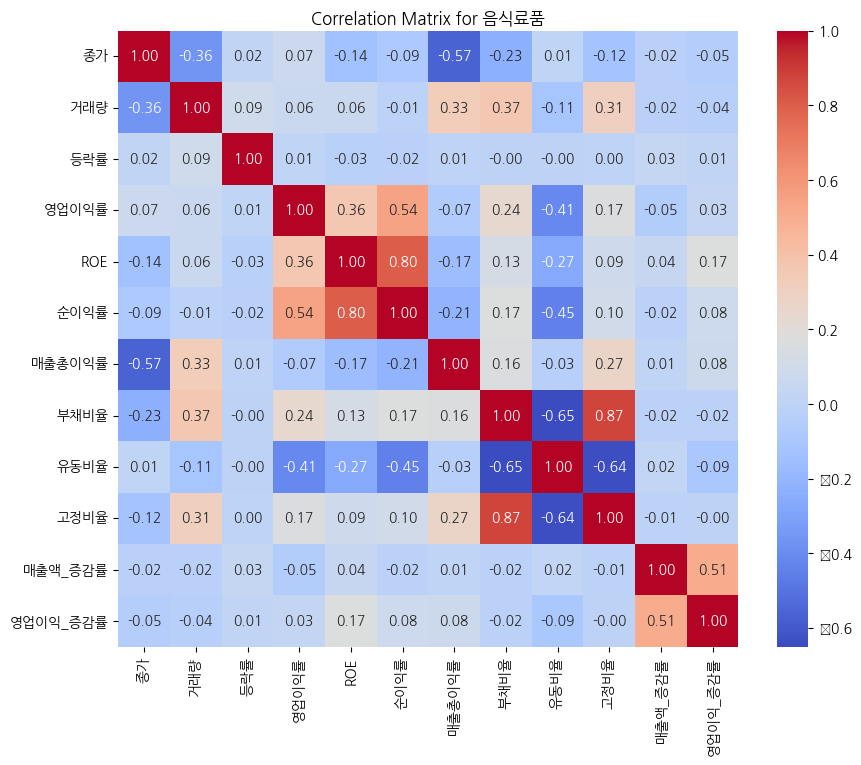


[Correlation Matrix for 의약품]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.085476  0.010134 -0.168861 -0.059160 -0.205700   
거래량      -0.085476  1.000000  0.264766 -0.044031  0.006541  0.025094   
등락률       0.010134  0.264766  1.000000  0.010427  0.005606  0.008447   
영업이익률    -0.168861 -0.044031  0.010427  1.000000  0.251944  0.669586   
ROE      -0.059160  0.006541  0.005606  0.251944  1.000000  0.587036   
순이익률     -0.205700  0.025094  0.008447  0.669586  0.587036  1.000000   
매출총이익률    0.259559 -0.013841 -0.010277 -0.083080  0.167356  0.028628   
부채비율      0.166802 -0.195254  0.004250  0.274705  0.048738  0.135585   
유동비율     -0.215264  0.098710 -0.008633 -0.321424 -0.070601 -0.176650   
고정비율      0.373004 -0.169863  0.007461  0.262938 -0.093541  0.001189   
매출액_증감률   0.024002 -0.055335 -0.009606  0.005881  0.055855 -0.014986   
영업이익_증감률 -0.055800  0.154704  0.002745  0.042171  0.047685  0.027613   

            매출총이익률      부채비율     

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


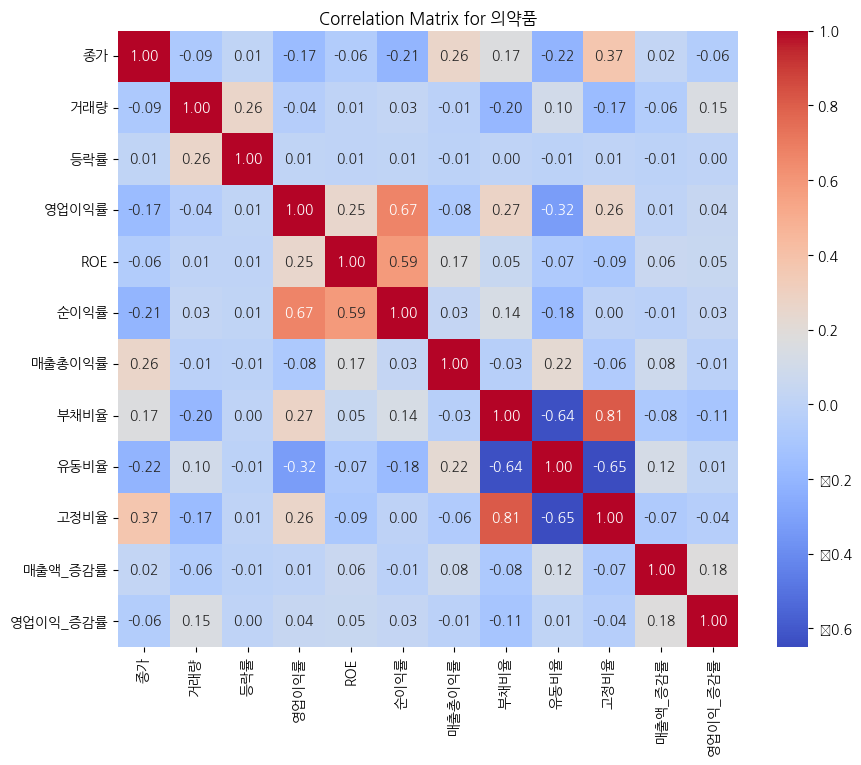


[Correlation Matrix for 운수창고업]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.331556 -0.007900  0.418875  0.278064  0.324627   
거래량      -0.331556  1.000000  0.256810 -0.198102 -0.152010 -0.112660   
등락률      -0.007900  0.256810  1.000000  0.019422  0.017332  0.014063   
영업이익률     0.418875 -0.198102  0.019422  1.000000  0.726958  0.862656   
ROE       0.278064 -0.152010  0.017332  0.726958  1.000000  0.729014   
순이익률      0.324627 -0.112660  0.014063  0.862656  0.729014  1.000000   
매출총이익률   -0.217047 -0.100855 -0.049748 -0.571671 -0.549354 -0.640606   
부채비율      0.132614  0.143276  0.055412  0.052371 -0.034950  0.152501   
유동비율     -0.189390 -0.023551 -0.019142 -0.246618 -0.239412 -0.287358   
고정비율      0.048307  0.197264  0.051728  0.040094 -0.078998  0.136926   
매출액_증감률  -0.009264  0.047814  0.004536 -0.137676 -0.331490 -0.120940   
영업이익_증감률 -0.099960  0.116842  0.049738 -0.077145 -0.103743 -0.033748   

            매출총이익률      부채비율   

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


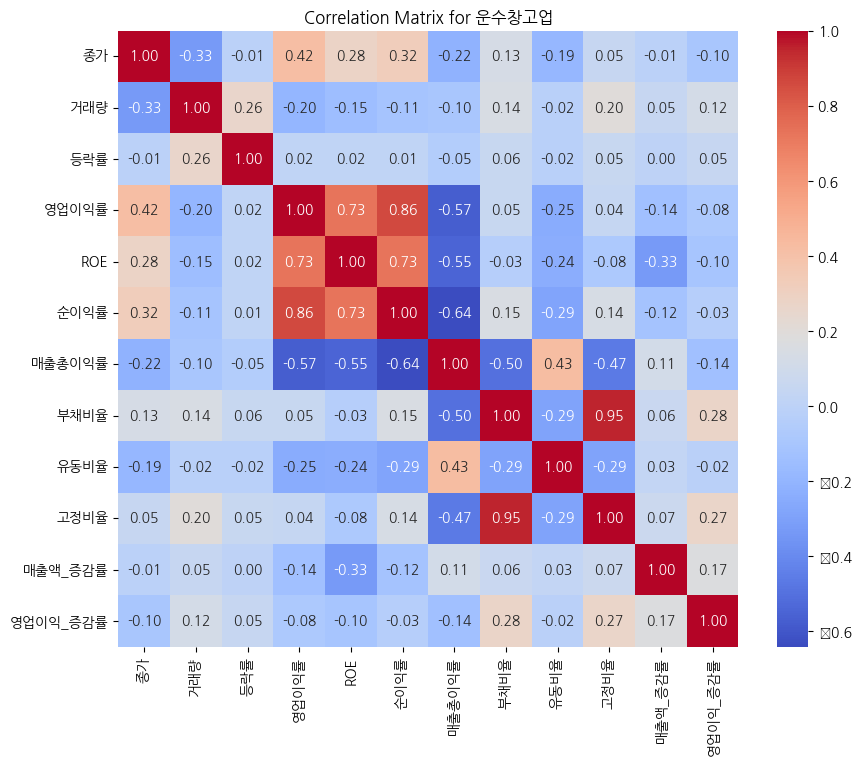


[Correlation Matrix for 기타금융]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.068054  0.020943  0.022730  0.105131  0.035681   
거래량      -0.068054  1.000000  0.127359 -0.005467  0.011866  0.002331   
등락률       0.020943  0.127359  1.000000 -0.000620  0.003769  0.014997   
영업이익률     0.022730 -0.005467 -0.000620  1.000000  0.264066  0.150376   
ROE       0.105131  0.011866  0.003769  0.264066  1.000000  0.237847   
순이익률      0.035681  0.002331  0.014997  0.150376  0.237847  1.000000   
매출총이익률   -0.119266 -0.136260 -0.003313  0.239369  0.069396  0.025368   
부채비율     -0.126866  0.348858  0.012125  0.106570  0.079113  0.057259   
유동비율      0.021152 -0.148071 -0.008908  0.068225  0.056850  0.066073   
고정비율      0.215872 -0.169018 -0.003057 -0.137314 -0.165421  0.045404   
매출액_증감률   0.042724 -0.028634  0.014951  0.015012 -0.043895  0.013062   
영업이익_증감률  0.009060  0.031051  0.016392  0.004447  0.008266  0.007132   

            매출총이익률      부채비율    

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


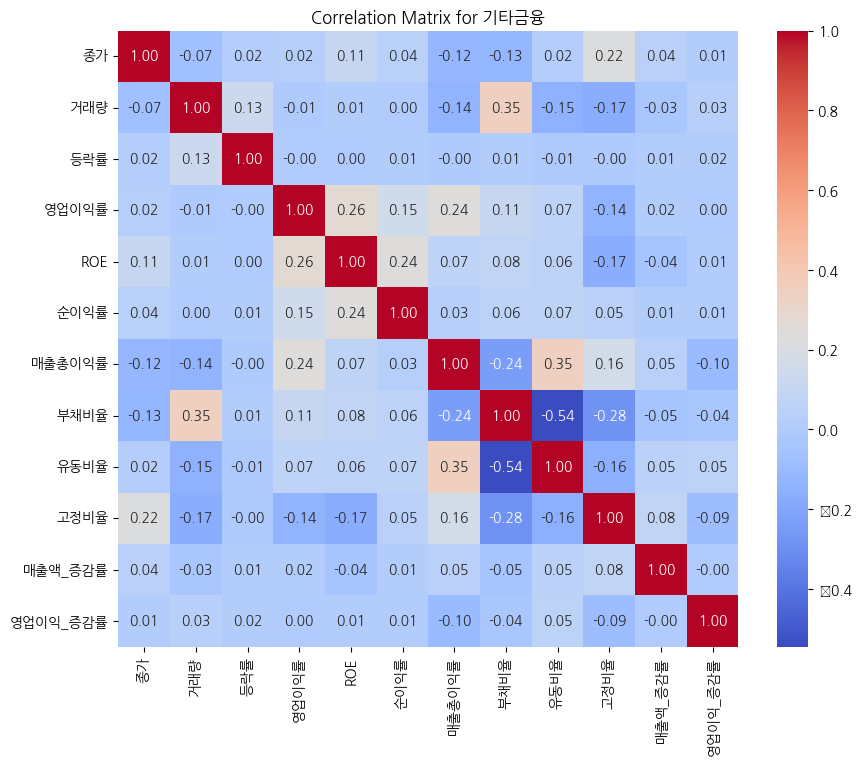


[Correlation Matrix for 화학]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.104023  0.000823 -0.158485 -0.190901 -0.097324   
거래량      -0.104023  1.000000  0.216277 -0.082719 -0.014916 -0.038807   
등락률       0.000823  0.216277  1.000000 -0.007700  0.007786  0.010641   
영업이익률    -0.158485 -0.082719 -0.007700  1.000000  0.482666  0.612952   
ROE      -0.190901 -0.014916  0.007786  0.482666  1.000000  0.681642   
순이익률     -0.097324 -0.038807  0.010641  0.612952  0.681642  1.000000   
매출총이익률    0.199590 -0.008559 -0.008088  0.214520  0.185181  0.169069   
부채비율      0.016022  0.043879  0.016177 -0.098599 -0.283273 -0.225244   
유동비율     -0.029235 -0.085022 -0.008253  0.110392  0.173182  0.132811   
고정비율     -0.009036  0.054770  0.014936 -0.173241 -0.285154 -0.306548   
매출액_증감률   0.020108 -0.014450  0.011215  0.029537 -0.138386  0.026618   
영업이익_증감률 -0.015725  0.026691  0.007241 -0.062842 -0.146319 -0.041621   

            매출총이익률      부채비율      

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


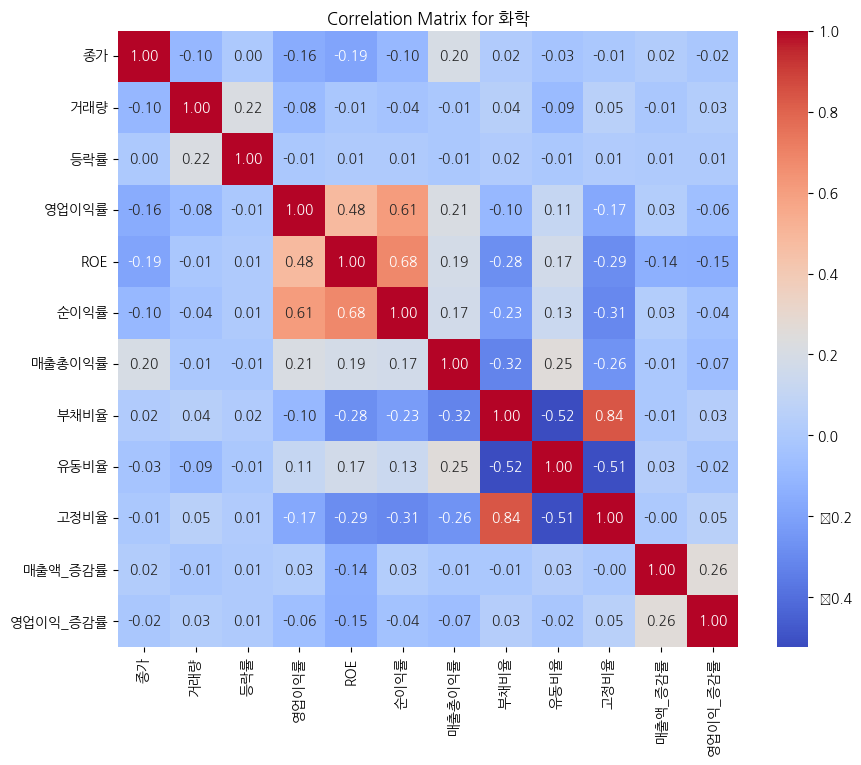


[Correlation Matrix for 운수장비]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.120549  0.016102  0.282608  0.079662  0.288998   
거래량      -0.120549  1.000000  0.154674 -0.031859  0.008562 -0.042658   
등락률       0.016102  0.154674  1.000000  0.005889 -0.001403 -0.000635   
영업이익률     0.282608 -0.031859  0.005889  1.000000  0.194614  0.874243   
ROE       0.079662  0.008562 -0.001403  0.194614  1.000000  0.214938   
순이익률      0.288998 -0.042658 -0.000635  0.874243  0.214938  1.000000   
매출총이익률    0.264093 -0.115735  0.003411  0.754662  0.153228  0.739690   
부채비율     -0.056782  0.004260  0.002161 -0.102394 -0.963745 -0.117340   
유동비율     -0.064495 -0.089239 -0.019883 -0.100114  0.043136  0.003825   
고정비율     -0.037019 -0.001934  0.000987 -0.080863 -0.963551 -0.091945   
매출액_증감률  -0.011005  0.010890  0.009269 -0.046388 -0.026810 -0.017039   
영업이익_증감률 -0.055927 -0.003839 -0.000361 -0.243579 -0.052431 -0.229047   

            매출총이익률      부채비율    

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


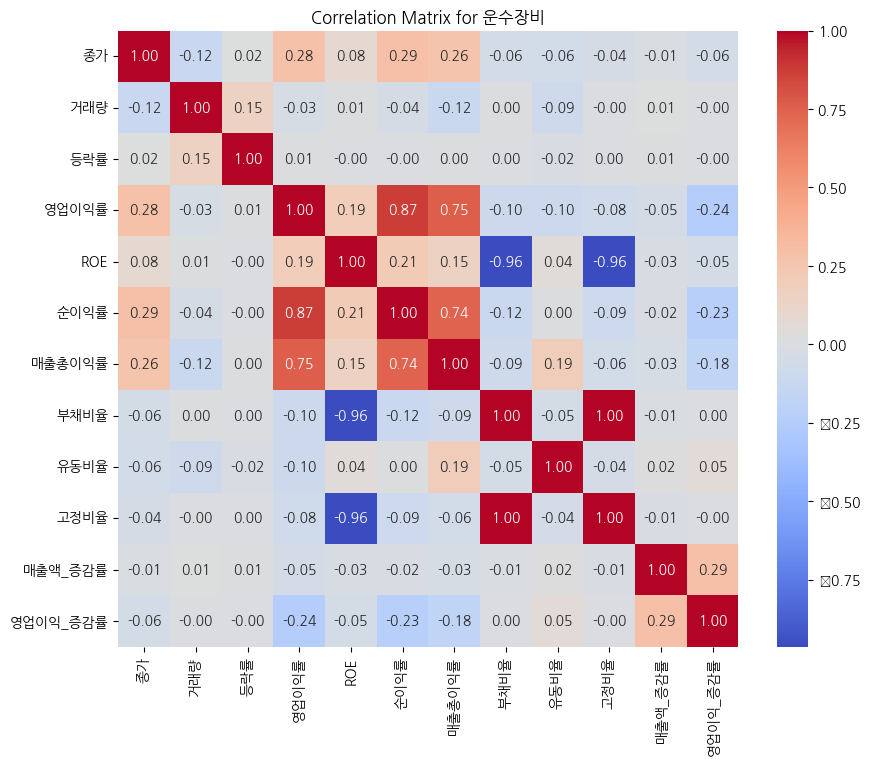


[Correlation Matrix for 전기전자]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.153682  0.004817 -0.012458  0.157185  0.123980   
거래량      -0.153682  1.000000  0.074701  0.184264 -0.115064 -0.109429   
등락률       0.004817  0.074701  1.000000  0.005854 -0.008765  0.004541   
영업이익률    -0.012458  0.184264  0.005854  1.000000  0.227699  0.714246   
ROE       0.157185 -0.115064 -0.008765  0.227699  1.000000  0.450498   
순이익률      0.123980 -0.109429  0.004541  0.714246  0.450498  1.000000   
매출총이익률    0.074360  0.287874  0.001955  0.806060  0.102803  0.519529   
부채비율     -0.131395 -0.134653  0.020345 -0.132656 -0.157852 -0.089226   
유동비율     -0.102569  0.138345 -0.013477  0.100168  0.028663  0.045087   
고정비율      0.071067 -0.018762 -0.001212 -0.278058 -0.263453 -0.243658   
매출액_증감률   0.012698 -0.002478  0.006048  0.079014 -0.120687  0.056209   
영업이익_증감률 -0.011159 -0.012507 -0.017617 -0.036068  0.161401  0.019552   

            매출총이익률      부채비율    

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


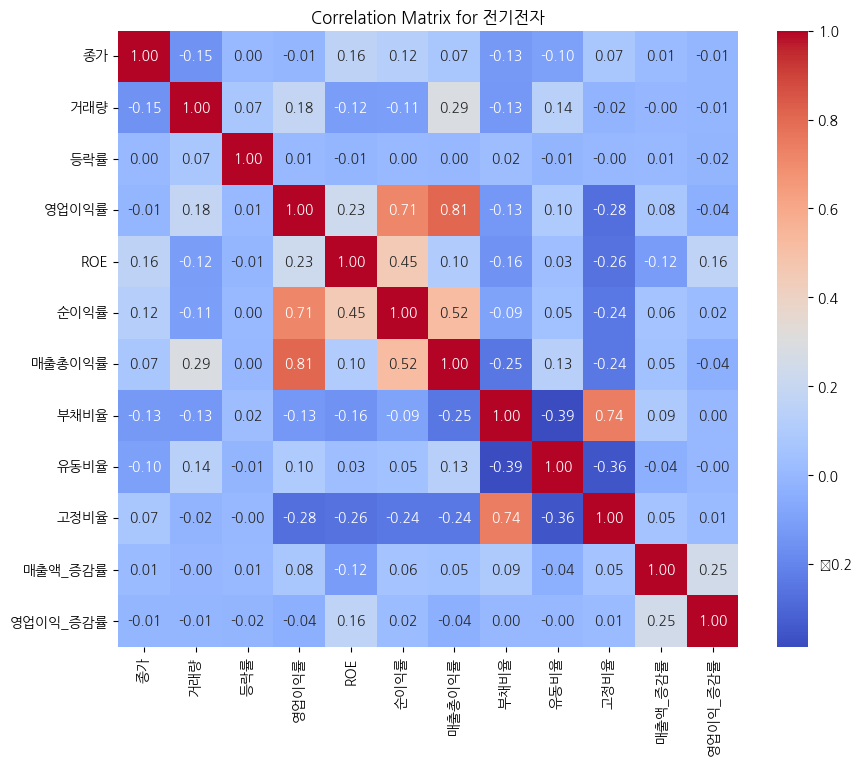


[Correlation Matrix for 철강금속]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.154614 -0.001106  0.246721 -0.071711 -0.247846   
거래량      -0.154614  1.000000  0.247482  0.042211  0.167440  0.105547   
등락률      -0.001106  0.247482  1.000000 -0.011232 -0.010811  0.000153   
영업이익률     0.246721  0.042211 -0.011232  1.000000  0.276960  0.264131   
ROE      -0.071711  0.167440 -0.010811  0.276960  1.000000  0.652854   
순이익률     -0.247846  0.105547  0.000153  0.264131  0.652854  1.000000   
매출총이익률   -0.234931  0.034649 -0.012926  0.213167  0.101227 -0.001006   
부채비율     -0.476553  0.179800  0.024291 -0.181159 -0.051526  0.199506   
유동비율      0.450641 -0.176618 -0.012434  0.212630 -0.232208 -0.278843   
고정비율     -0.004377 -0.020814  0.021697 -0.370019 -0.310243 -0.116581   
매출액_증감률  -0.005341  0.099239  0.033622  0.036447 -0.071060  0.015542   
영업이익_증감률 -0.013577 -0.009009 -0.019453 -0.039604 -0.042386 -0.011425   

            매출총이익률      부채비율    

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


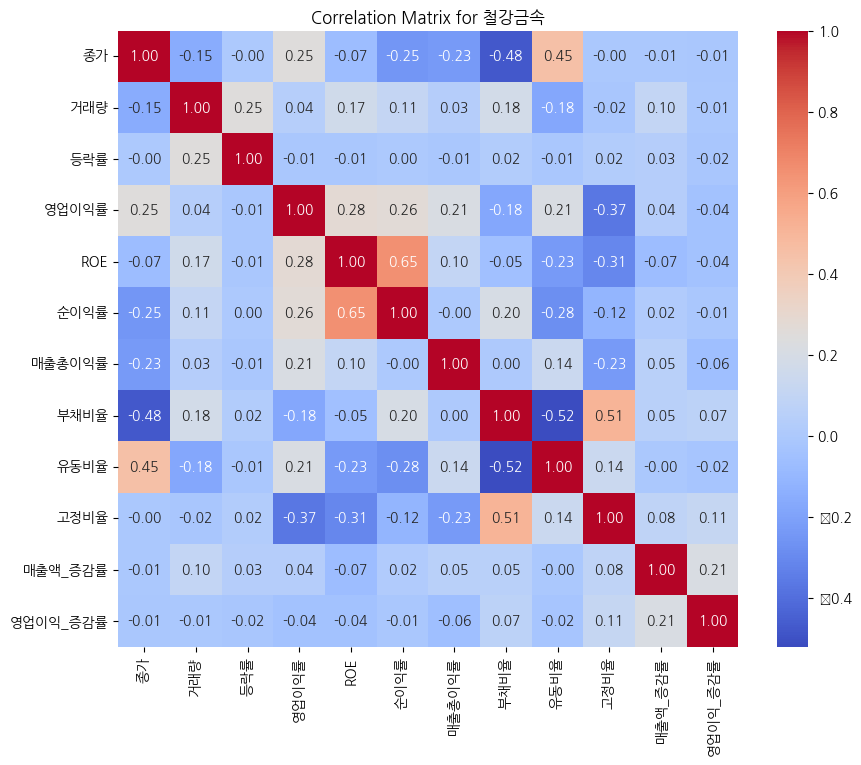


[Correlation Matrix for 건설업]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.307394  0.012378  0.700921  0.430065  0.292233   
거래량      -0.307394  1.000000  0.165414 -0.270212 -0.059879  0.032956   
등락률       0.012378  0.165414  1.000000  0.001877 -0.002656 -0.001022   
영업이익률     0.700921 -0.270212  0.001877  1.000000  0.183928 -0.003727   
ROE       0.430065 -0.059879 -0.002656  0.183928  1.000000  0.721763   
순이익률      0.292233  0.032956 -0.001022 -0.003727  0.721763  1.000000   
매출총이익률    0.313365 -0.024732 -0.002389  0.497711 -0.061749 -0.238503   
부채비율     -0.595025  0.318941  0.005223 -0.502501 -0.169435  0.109875   
유동비율      0.329624 -0.204325  0.004855  0.422742 -0.042845 -0.320547   
고정비율     -0.383300  0.183520  0.008164 -0.194920 -0.203692 -0.024190   
매출액_증감률   0.037187 -0.001833  0.006595  0.019051 -0.292831  0.018438   
영업이익_증감률 -0.014806  0.077761  0.005806  0.059986 -0.140241  0.077347   

            매출총이익률      부채비율     

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


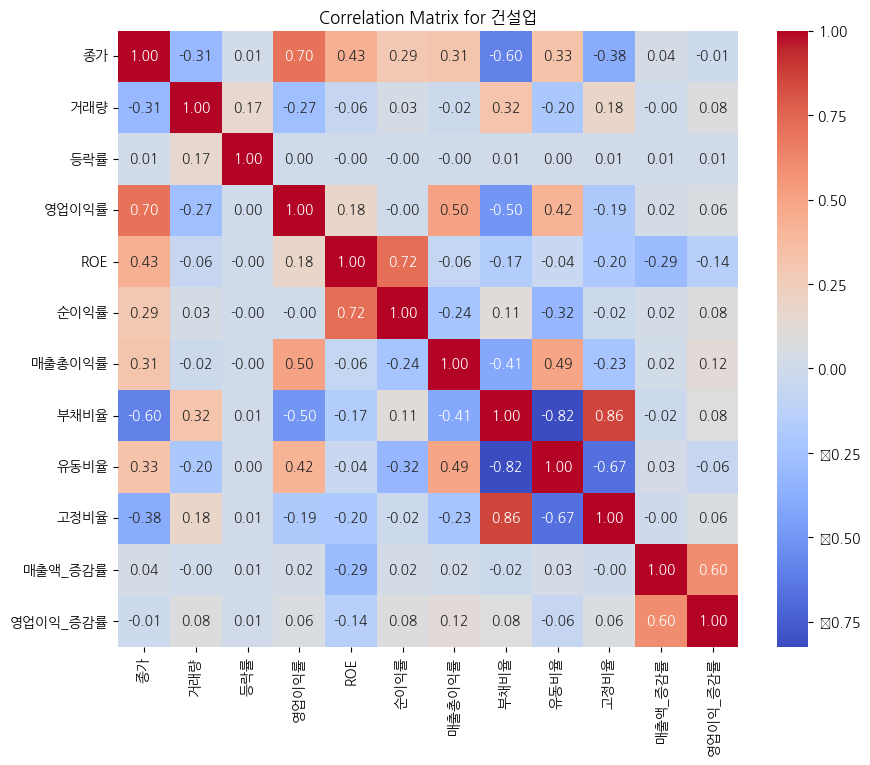


[Correlation Matrix for 보험]
                종가       거래량       등락률  영업이익률       ROE  순이익률  매출총이익률  \
종가        1.000000 -0.449391  0.043498    NaN  0.466541   NaN     NaN   
거래량      -0.449391  1.000000  0.036361    NaN  0.055592   NaN     NaN   
등락률       0.043498  0.036361  1.000000    NaN  0.006653   NaN     NaN   
영업이익률          NaN       NaN       NaN    NaN       NaN   NaN     NaN   
ROE       0.466541  0.055592  0.006653    NaN  1.000000   NaN     NaN   
순이익률           NaN       NaN       NaN    NaN       NaN   NaN     NaN   
매출총이익률         NaN       NaN       NaN    NaN       NaN   NaN     NaN   
부채비율     -0.703591  0.666624 -0.034660    NaN -0.142440   NaN     NaN   
유동비율           NaN       NaN       NaN    NaN       NaN   NaN     NaN   
고정비율           NaN       NaN       NaN    NaN       NaN   NaN     NaN   
매출액_증감률        NaN       NaN       NaN    NaN       NaN   NaN     NaN   
영업이익_증감률  0.376358 -0.120521  0.031709    NaN  0.400808   NaN     NaN   

              부채비율  유

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


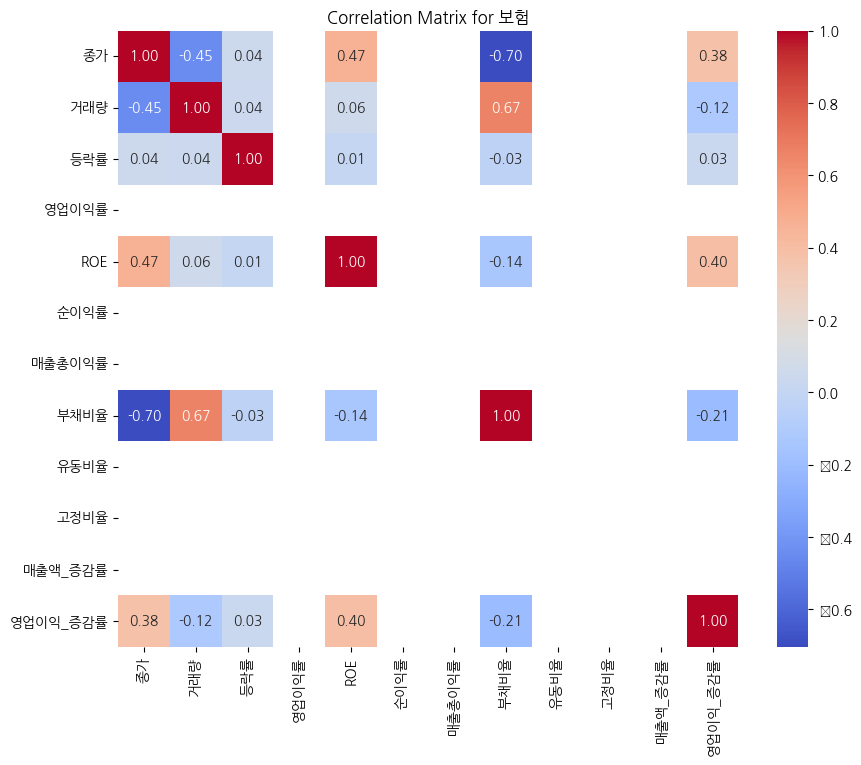


[Correlation Matrix for 유통업]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.151188  0.003574 -0.033205 -0.124646 -0.201554   
거래량      -0.151188  1.000000  0.209402 -0.094895 -0.039363 -0.043468   
등락률       0.003574  0.209402  1.000000  0.004746 -0.012518  0.002458   
영업이익률    -0.033205 -0.094895  0.004746  1.000000  0.305439  0.364233   
ROE      -0.124646 -0.039363 -0.012518  0.305439  1.000000  0.469429   
순이익률     -0.201554 -0.043468  0.002458  0.364233  0.469429  1.000000   
매출총이익률    0.304932 -0.227827 -0.010881 -0.002903  0.123932 -0.196185   
부채비율     -0.073991  0.166497 -0.000918 -0.249702 -0.222136 -0.241055   
유동비율     -0.278142 -0.060397  0.006120  0.362014  0.243269  0.710162   
고정비율      0.097032  0.041447 -0.003422 -0.297649 -0.130304 -0.266566   
매출액_증감률   0.077140 -0.031201  0.009246 -0.016139 -0.229125  0.024530   
영업이익_증감률  0.039229  0.000805 -0.006401 -0.002801 -0.085945  0.078405   

            매출총이익률      부채비율     

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


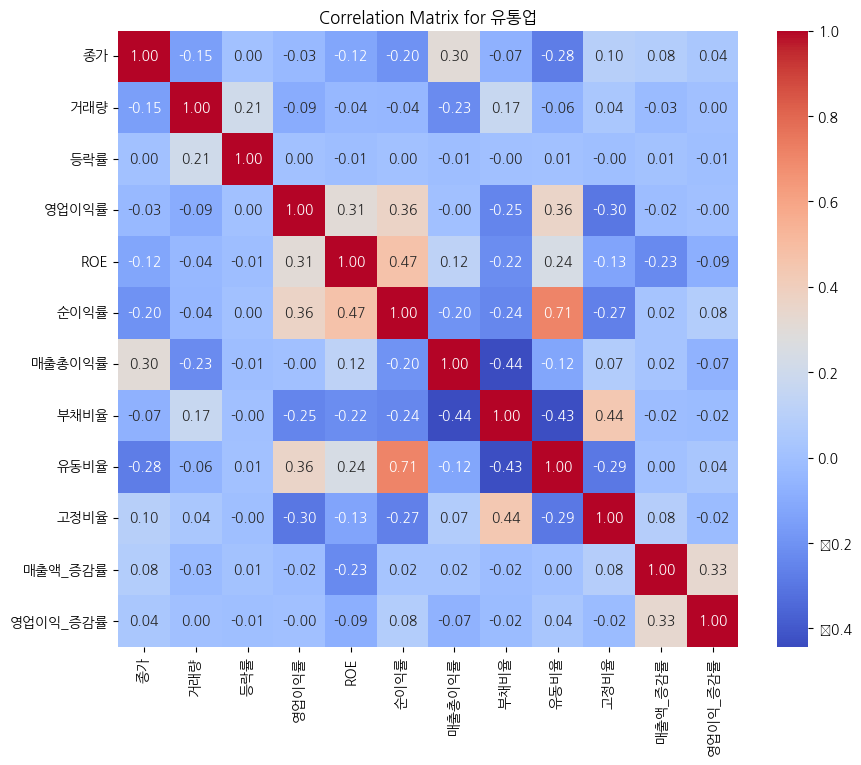


[Correlation Matrix for 서비스업]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.067377  0.001076 -0.002211  0.086349 -0.012939   
거래량      -0.067377  1.000000  0.195403  0.009180  0.003786  0.009169   
등락률       0.001076  0.195403  1.000000  0.007066  0.005726  0.006810   
영업이익률    -0.002211  0.009180  0.007066  1.000000  0.048914  0.996184   
ROE       0.086349  0.003786  0.005726  0.048914  1.000000  0.051228   
순이익률     -0.012939  0.009169  0.006810  0.996184  0.051228  1.000000   
매출총이익률    0.037520 -0.020859  0.001654  0.124557  0.019684  0.065017   
부채비율     -0.128996  0.001657 -0.008439  0.031974 -0.661669  0.030011   
유동비율      0.387542 -0.084878 -0.008259 -0.085001  0.111004 -0.094334   
고정비율     -0.111129 -0.004480 -0.008529  0.039200 -0.644639  0.037502   
매출액_증감률  -0.040259  0.092715  0.011913 -0.053703 -0.029237 -0.057508   
영업이익_증감률 -0.036192  0.010135  0.002803  0.007541 -0.422203  0.007283   

            매출총이익률      부채비율    

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


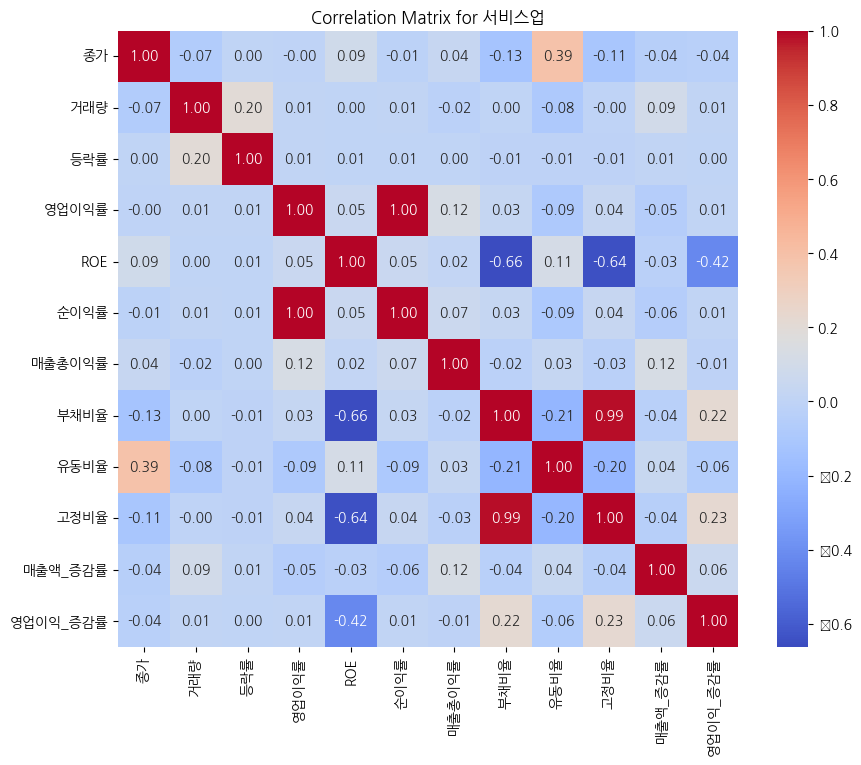


[Correlation Matrix for 증권]
                종가       거래량       등락률  영업이익률       ROE  순이익률  매출총이익률  \
종가        1.000000 -0.324936  0.009237    NaN  0.680803   NaN     NaN   
거래량      -0.324936  1.000000  0.144253    NaN -0.249418   NaN     NaN   
등락률       0.009237  0.144253  1.000000    NaN -0.007778   NaN     NaN   
영업이익률          NaN       NaN       NaN    NaN       NaN   NaN     NaN   
ROE       0.680803 -0.249418 -0.007778    NaN  1.000000   NaN     NaN   
순이익률           NaN       NaN       NaN    NaN       NaN   NaN     NaN   
매출총이익률         NaN       NaN       NaN    NaN       NaN   NaN     NaN   
부채비율     -0.318288  0.174129 -0.006054    NaN -0.552284   NaN     NaN   
유동비율           NaN       NaN       NaN    NaN       NaN   NaN     NaN   
고정비율           NaN       NaN       NaN    NaN       NaN   NaN     NaN   
매출액_증감률        NaN       NaN       NaN    NaN       NaN   NaN     NaN   
영업이익_증감률  0.311874 -0.087787  0.006321    NaN  0.690135   NaN     NaN   

              부채비율  유

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


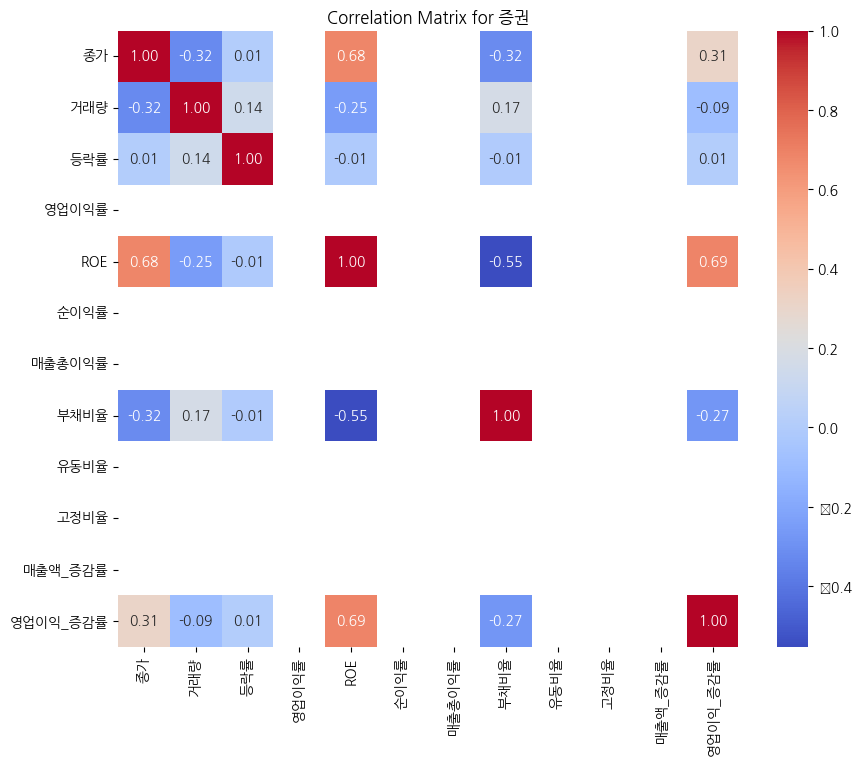


[Correlation Matrix for 전기가스업]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.048711  0.063536  0.489612  0.173092  0.433154   
거래량      -0.048711  1.000000  0.227080 -0.118595  0.052221  0.001196   
등락률       0.063536  0.227080  1.000000  0.013067  0.013596  0.018163   
영업이익률     0.489612 -0.118595  0.013067  1.000000  0.605366  0.928444   
ROE       0.173092  0.052221  0.013596  0.605366  1.000000  0.677695   
순이익률      0.433154  0.001196  0.018163  0.928444  0.677695  1.000000   
매출총이익률    0.528731 -0.204145  0.009582  0.969944  0.565263  0.866127   
부채비율     -0.034999 -0.010963  0.013064 -0.073662 -0.330489  0.068028   
유동비율      0.513732 -0.116576  0.004861  0.419083  0.269185  0.199713   
고정비율     -0.197720  0.085543  0.011727 -0.230446 -0.322220 -0.043010   
매출액_증감률   0.235769 -0.093465 -0.011762  0.211896 -0.370543  0.115448   
영업이익_증감률 -0.338782  0.127245  0.006323 -0.200806  0.359079 -0.081250   

            매출총이익률      부채비율   

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


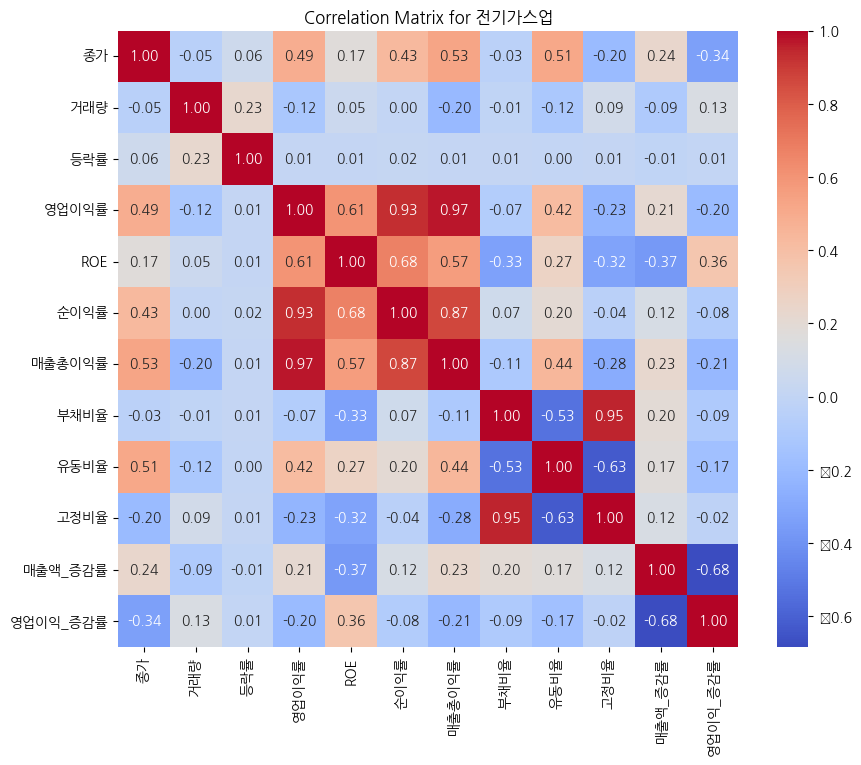


[Correlation Matrix for 통신업]
                종가       거래량       등락률     영업이익률       ROE      순이익률  매출총이익률  \
종가        1.000000 -0.169144  0.030660 -0.449208 -0.400739 -0.280950     NaN   
거래량      -0.169144  1.000000  0.107613 -0.030916 -0.072520 -0.177171     NaN   
등락률       0.030660  0.107613  1.000000  0.001308 -0.005846 -0.022641     NaN   
영업이익률    -0.449208 -0.030916  0.001308  1.000000  0.307689  0.217014     NaN   
ROE      -0.400739 -0.072520 -0.005846  0.307689  1.000000  0.596323     NaN   
순이익률     -0.280950 -0.177171 -0.022641  0.217014  0.596323  1.000000     NaN   
매출총이익률         NaN       NaN       NaN       NaN       NaN       NaN     NaN   
부채비율      0.177735  0.051562  0.007875  0.052465  0.386343  0.152162     NaN   
유동비율     -0.129821  0.250936  0.012979  0.199096  0.032251 -0.188851     NaN   
고정비율      0.330067  0.081771  0.012217 -0.097332  0.210344 -0.080677     NaN   
매출액_증감률   0.055460  0.032740  0.042216 -0.039696 -0.052918 -0.060510     NaN   
영업이익_증감률 -

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


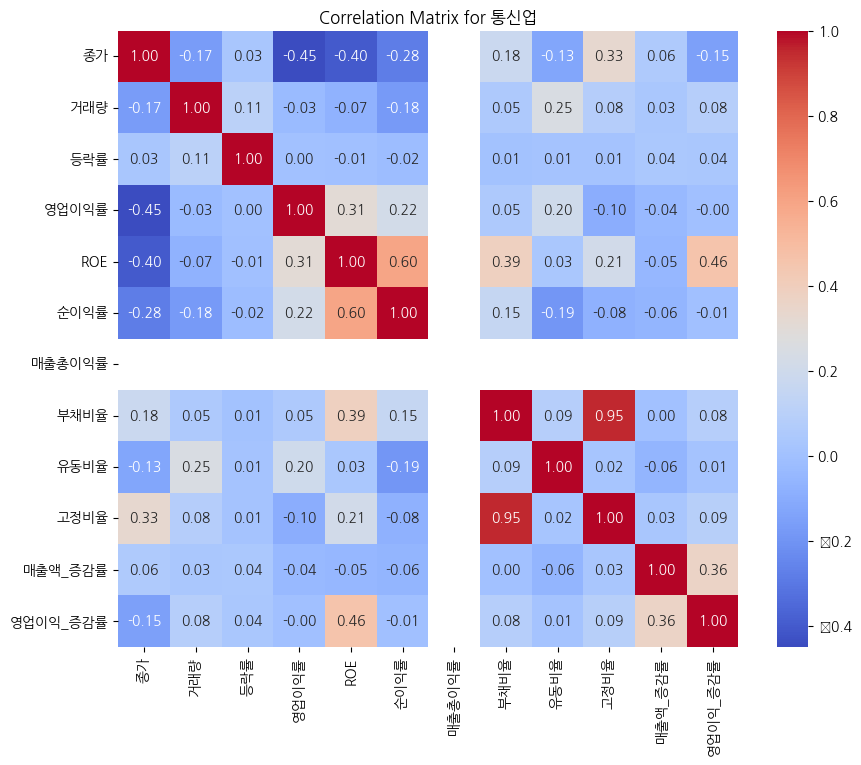


[Correlation Matrix for 기계]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.174837  0.021142 -0.271247 -0.064950  0.024586   
거래량      -0.174837  1.000000  0.235982 -0.074682  0.017090  0.043047   
등락률       0.021142  0.235982  1.000000 -0.009085  0.021433  0.039294   
영업이익률    -0.271247 -0.074682 -0.009085  1.000000  0.385737  0.034920   
ROE      -0.064950  0.017090  0.021433  0.385737  1.000000  0.565925   
순이익률      0.024586  0.043047  0.039294  0.034920  0.565925  1.000000   
매출총이익률    0.034973  0.011242  0.016573  0.552560  0.559400  0.405776   
부채비율     -0.062787  0.082229 -0.003640 -0.363372 -0.407744 -0.248017   
유동비율      0.172201 -0.040635 -0.004546  0.041325  0.115100  0.063579   
고정비율     -0.220725  0.156817  0.000613 -0.279906 -0.257191 -0.156150   
매출액_증감률   0.037545 -0.011943  0.000849  0.024883 -0.138312 -0.046347   
영업이익_증감률 -0.013046 -0.008100 -0.014809 -0.147760 -0.229814 -0.047118   

            매출총이익률      부채비율      

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


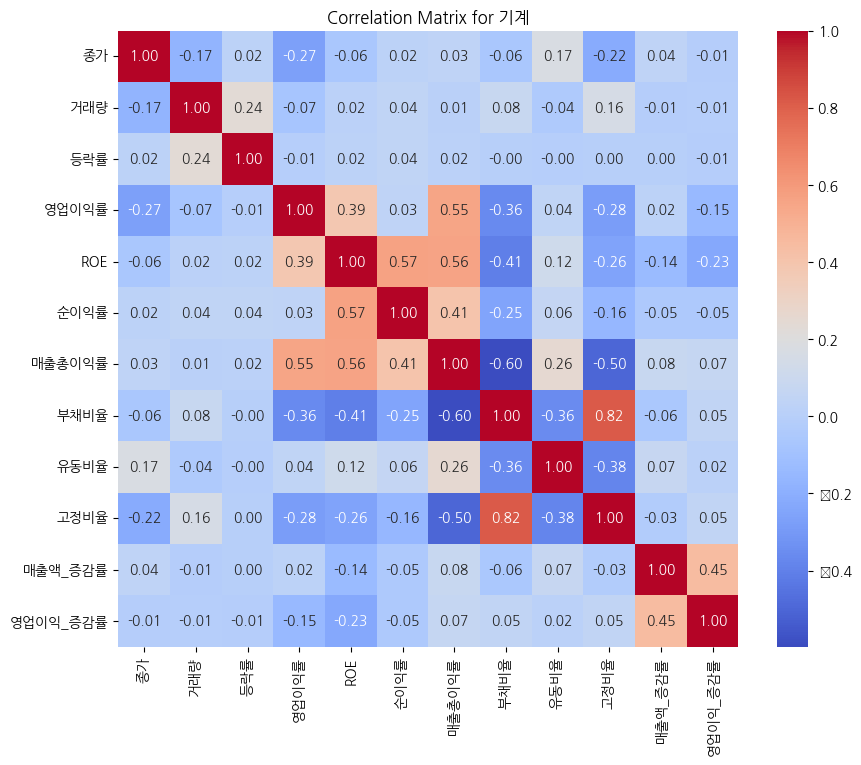


[Correlation Matrix for 은행]
                종가       거래량       등락률  영업이익률       ROE  순이익률  매출총이익률  \
종가        1.000000  0.070273  0.036341    NaN  0.087078   NaN     NaN   
거래량       0.070273  1.000000  0.292901    NaN -0.155370   NaN     NaN   
등락률       0.036341  0.292901  1.000000    NaN -0.054767   NaN     NaN   
영업이익률          NaN       NaN       NaN    NaN       NaN   NaN     NaN   
ROE       0.087078 -0.155370 -0.054767    NaN  1.000000   NaN     NaN   
순이익률           NaN       NaN       NaN    NaN       NaN   NaN     NaN   
매출총이익률         NaN       NaN       NaN    NaN       NaN   NaN     NaN   
부채비율     -0.898405  0.044503  0.014681    NaN -0.314982   NaN     NaN   
유동비율           NaN       NaN       NaN    NaN       NaN   NaN     NaN   
고정비율           NaN       NaN       NaN    NaN       NaN   NaN     NaN   
매출액_증감률        NaN       NaN       NaN    NaN       NaN   NaN     NaN   
영업이익_증감률  0.111284 -0.186551 -0.059619    NaN  0.968649   NaN     NaN   

              부채비율  유

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


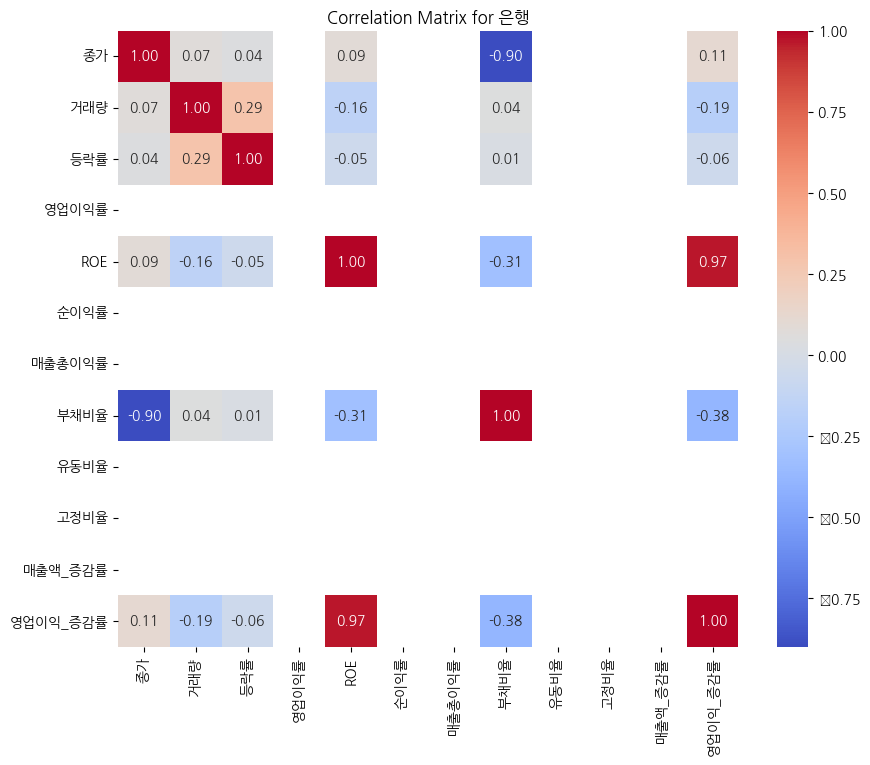


[Correlation Matrix for 기타제조업]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.083597  0.131200  0.663769  0.419348  0.533167   
거래량      -0.083597  1.000000  0.079916 -0.209010 -0.153423 -0.164225   
등락률       0.131200  0.079916  1.000000  0.043812  0.032293  0.046897   
영업이익률     0.663769 -0.209010  0.043812  1.000000  0.738199  0.952727   
ROE       0.419348 -0.153423  0.032293  0.738199  1.000000  0.721087   
순이익률      0.533167 -0.164225  0.046897  0.952727  0.721087  1.000000   
매출총이익률   -0.470023  0.391366 -0.011767 -0.518876 -0.416435 -0.436603   
부채비율      0.579812 -0.200889  0.029468  0.738949  0.594665  0.724009   
유동비율     -0.473525  0.297702 -0.016596 -0.585062 -0.482010 -0.543751   
고정비율      0.610045 -0.389404  0.027733  0.718010  0.511780  0.650544   
매출액_증감률  -0.024265 -0.013863 -0.026246  0.004976 -0.369796  0.004997   
영업이익_증감률 -0.065938  0.126320 -0.002254 -0.411853 -0.844106 -0.370025   

            매출총이익률      부채비율   

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


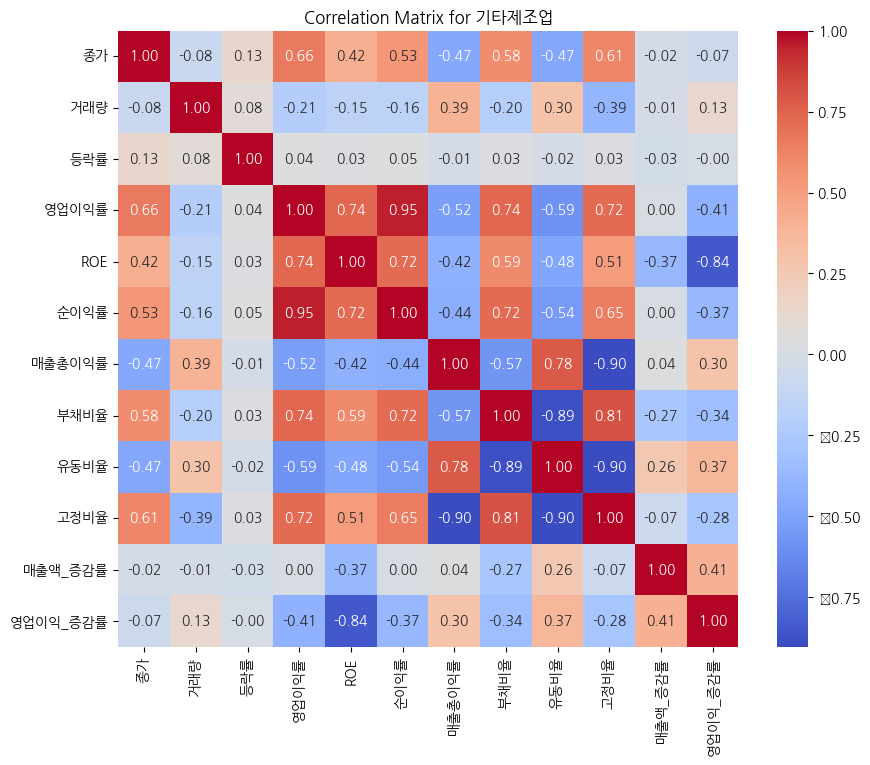


[Correlation Matrix for 섬유의복]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.188604  0.001260 -0.831202 -0.443741 -0.589476   
거래량      -0.188604  1.000000  0.278429  0.111730  0.113946  0.190387   
등락률       0.001260  0.278429  1.000000  0.023389  0.035905  0.053366   
영업이익률    -0.831202  0.111730  0.023389  1.000000  0.552484  0.764094   
ROE      -0.443741  0.113946  0.035905  0.552484  1.000000  0.717076   
순이익률     -0.589476  0.190387  0.053366  0.764094  0.717076  1.000000   
매출총이익률    0.903864 -0.249477 -0.023551 -0.907670 -0.505708 -0.726189   
부채비율     -0.380892  0.339718  0.029489  0.454978  0.240375  0.470099   
유동비율     -0.337725 -0.046397  0.015677  0.157381  0.349222  0.310592   
고정비율      0.446716 -0.023652 -0.030597 -0.375874 -0.383414 -0.498422   
매출액_증감률   0.115137 -0.016247  0.007898 -0.090662 -0.564662 -0.139107   
영업이익_증감률 -0.158486  0.175595  0.030430  0.010691 -0.107251  0.043300   

            매출총이익률      부채비율    

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


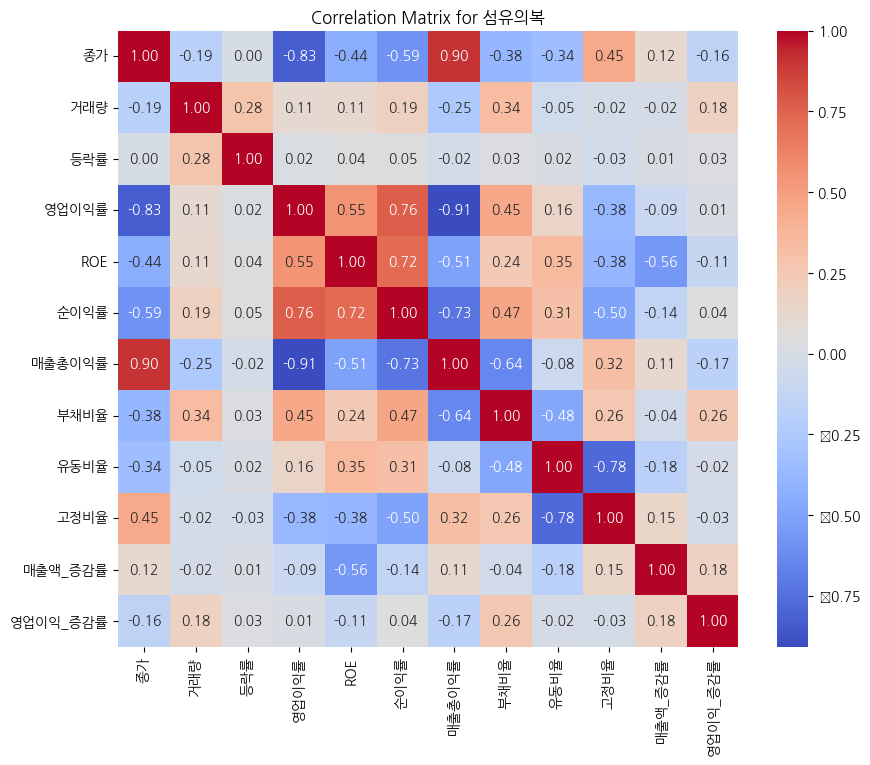


[Correlation Matrix for 의료정밀]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000 -0.180621  0.044933 -0.307132 -0.356545 -0.138230   
거래량      -0.180621  1.000000  0.200588  0.159875  0.162900  0.040962   
등락률       0.044933  0.200588  1.000000 -0.020031 -0.032267 -0.012153   
영업이익률    -0.307132  0.159875 -0.020031  1.000000  0.815385  0.932362   
ROE      -0.356545  0.162900 -0.032267  0.815385  1.000000  0.686119   
순이익률     -0.138230  0.040962 -0.012153  0.932362  0.686119  1.000000   
매출총이익률    0.613554 -0.195786  0.007250  0.120704 -0.036970  0.288465   
부채비율      0.290984 -0.238074  0.043452 -0.414508 -0.403660 -0.284003   
유동비율     -0.534965  0.214437 -0.032959  0.677670  0.530437  0.609714   
고정비율      0.111379 -0.237263  0.040344 -0.776054 -0.690828 -0.649648   
매출액_증감률   0.128213 -0.114191 -0.021096 -0.039108 -0.067548 -0.032909   
영업이익_증감률  0.108659 -0.131242 -0.021989 -0.045136 -0.106942 -0.025503   

            매출총이익률      부채비율    

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


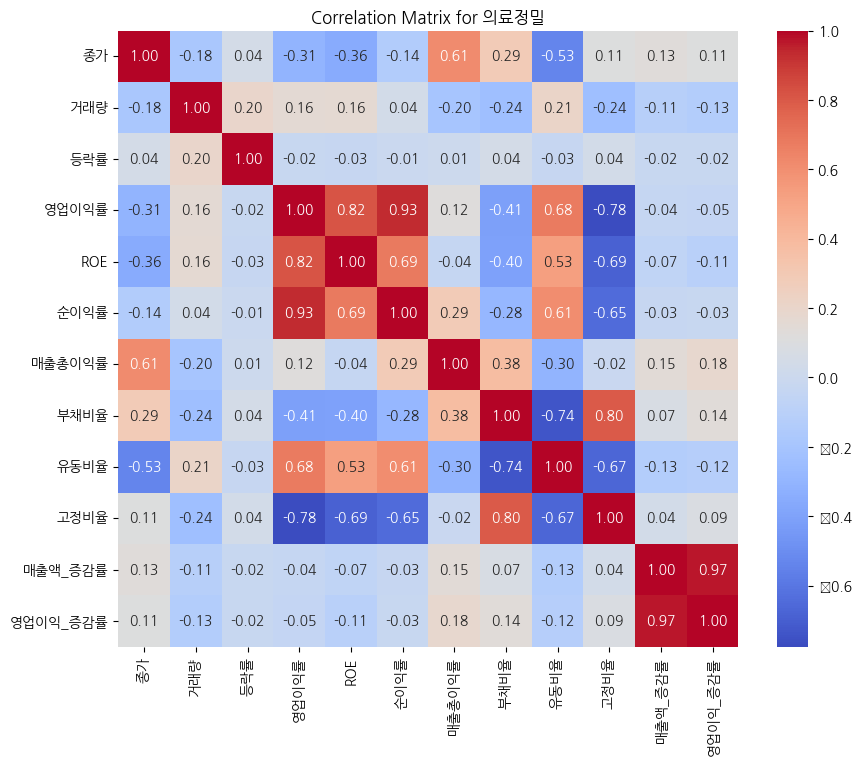


[Correlation Matrix for 비금속광물]
                종가       거래량       등락률     영업이익률       ROE      순이익률  \
종가        1.000000  0.365203  0.047106  0.485610 -0.138920  0.382661   
거래량       0.365203  1.000000  0.202291  0.194826 -0.049990  0.159924   
등락률       0.047106  0.202291  1.000000 -0.003091 -0.018683 -0.002715   
영업이익률     0.485610  0.194826 -0.003091  1.000000  0.192495  0.504314   
ROE      -0.138920 -0.049990 -0.018683  0.192495  1.000000  0.603965   
순이익률      0.382661  0.159924 -0.002715  0.504314  0.603965  1.000000   
매출총이익률    0.042089  0.055641  0.008473 -0.144520  0.151174  0.212214   
부채비율     -0.225021 -0.102356  0.023013  0.013522  0.193472  0.400438   
유동비율     -0.558072 -0.121575 -0.005559 -0.151482  0.093913 -0.006051   
고정비율     -0.229847 -0.103956  0.022130  0.024583  0.185524  0.376426   
매출액_증감률   0.088395  0.002775  0.029169  0.168100 -0.016957 -0.090339   
영업이익_증감률  0.000389  0.007988 -0.033646 -0.297298 -0.202281 -0.374995   

            매출총이익률      부채비율   

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


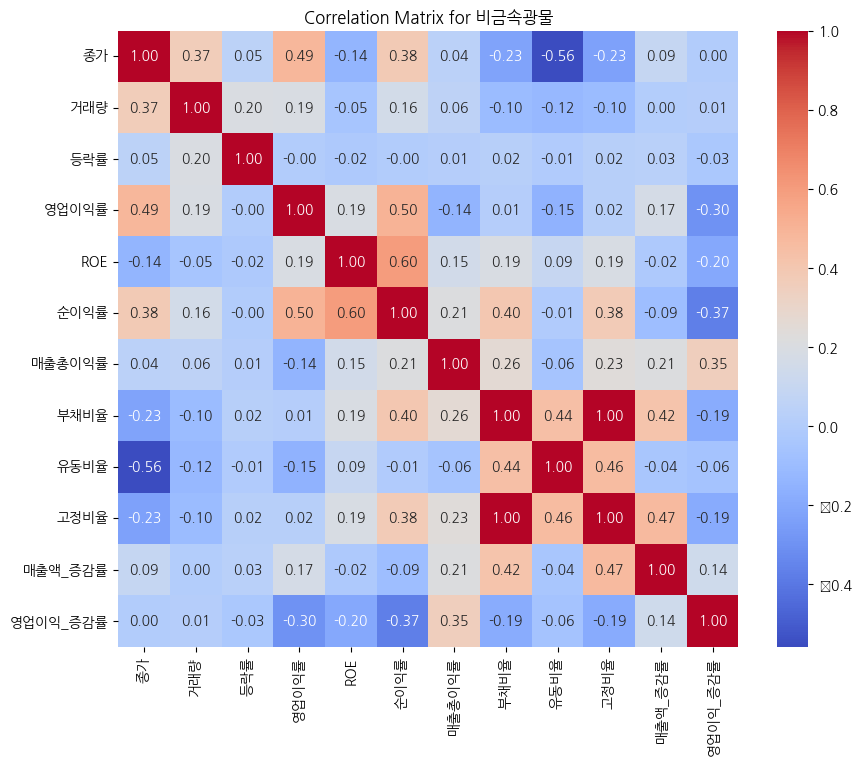

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
merged_data = pd.read_csv('merged_kospi_200_full_data.csv')

# 주요 변수 선택
correlation_features = ['종가', '거래량', '등락률', '영업이익률', 'ROE', '순이익률',
                        '매출총이익률', '부채비율', '유동비율', '고정비율',
                        '매출액_증감률', '영업이익_증감률']

# 실제 컬럼 확인
correlation_features = [col for col in correlation_features if col in merged_data.columns]
print("사용 가능한 상관분석 변수:", correlation_features)

# 결측값 처리
merged_data[correlation_features] = merged_data[correlation_features].fillna(0)

# 산업군 확인
industries = merged_data['industry'].unique()

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 상관분석 및 시각화
for industry in industries:
    industry_data = merged_data[merged_data['industry'] == industry]

    # 데이터 없는 경우 건너뜀
    if industry_data.empty:
        print(f"No data available for industry: {industry}")
        continue

    print(f"\n[Correlation Matrix for {industry}]")
    correlation_matrix = industry_data[correlation_features].corr()
    print(correlation_matrix)

    # 시각화
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f"Correlation Matrix for {industry}")
    plt.show()


1. 상관 분석 주요 해석

음식료품

ROE와 순이익률의 상관관계가 강함(0.80), 이는 음식료 산업의 수익성 지표가 강하게 연결되어 있음을 의미.

매출총이익률과 종가는 음의 상관관계(-0.56), 즉 매출총이익률이 높아질수록 주가가 하락 경향을 보임.

의약품

영업이익률과 순이익률의 상관관계가 강함(0.93), 이는 의약품 산업에서 수익성 지표가 밀접하게 연동됨.

ROE와 순이익률의 높은 상관관계(0.68),
수익성이 주가에 긍정적인 영향을 미칠 가능성.

운수창고업

영업이익률과 순이익률의 상관관계가 매우 강함(0.86), 이는 운수창고업에서도 수익성이 중요한 지표임을 나타냄.

종가와 영업이익률의 강한 양의 상관관계(0.41), 운수창고업의 주가가 영업수익에 민감하게 반응.

화학

영업이익률과 순이익률의 상관관계가 높음(0.61), 이는 화학 산업에서도 수익성의 중요성을 보여줌.

ROE와 순이익률의 높은 상관관계(0.68), 자본 효율성과 수익성 간의 연계가 강함.

운수장비

영업이익률과 순이익률의 매우 강한 상관관계(0.87), 이 산업의 수익성이 주가에 직접적인 영향을 미침.

부채비율과 ROE 간 음의 상관관계(-0.96), 부채가 높아질수록 자본 효율성이 저하되는 특징.

전기전자

영업이익률과 순이익률의 높은 상관관계(0.71), 이 산업에서도 수익성 지표가 중요.

종가와 ROE의 양의 상관관계(0.15), 자본 효율성이 주가에 미치는 영향은 상대적으로 낮음.

철강금속

ROE와 순이익률의 강한 양의 상관관계(0.65), 자본 효율성과 수익성이 핵심 변수.

영업이익률과 순이익률의 높은 상관관계(0.26), 철강 산업에서도 수익성이 중요한 변수.

건설업

종가와 영업이익률의 강한 양의 상관관계(0.70), 영업수익이 주가에 직접적으로 영향을 미침.

부채비율과 ROE 간 음의 상관관계(-0.59), 부채 관리가 중요함.

유통업

순이익률과 유동비율의 강한 상관관계(0.71), 유통업의 수익성과 유동성 간 밀접한 연관성을 보임.

영업이익률과 순이익률의 양의 상관관계(0.36), 수익성이 주가에 미치는 영향이 크지 않음.

서비스업

영업이익률과 순이익률의 매우 높은 상관관계(0.99), 서비스업에서는 수익성 지표가 절대적으로 중요.

종가와 ROE의 양의 상관관계(0.08), 자본
효율성의 영향은 미미.

전기가스업

영업이익률과 순이익률의 높은 상관관계(0.92), 이 산업에서도 수익성이 중요.

매출총이익률과 종가의 강한 양의 상관관계(0.52), 매출총이익이 주가에 긍정적 영향을 미침.

기계

영업이익률과 ROE의 상관관계(0.38), 기계 산업에서는 자본 효율성이 중요하지 않음.

매출총이익률과 영업이익률의 강한 상관관계(0.55), 매출에서 얻는 이익이 주요 변수.

기타제조업

영업이익률과 순이익률의 강한 상관관계(0.95), 기타 제조업에서도 수익성이 절대적으로 중요.

ROE와 영업이익률의 높은 상관관계(0.73), 자본 효율성이 수익성과 밀접.

2. 유사 산업군 묶음 및 가중치 제안

1. 수익성 중심 산업군

산업군: 음식료품, 서비스업, 의약품, 전기전자, 기타제조업

특징: 이익률(영업이익률, 순이익률)과 매출 성장률이 중요한 지표로 작용.

주요 지표:
영업이익률 (가중치: 0.4): 수익성을 나타내는 대표적인 변수.

순이익률 (가중치: 0.3): 기업의 최종 이익률.

매출액 증감률 (가중치: 0.2): 성장성을 평가.
ROE (가중치: 0.1): 자본 효율성을 간접적으로 반영.

2. 안정성 중심 산업군

산업군: 건설업, 운수장비, 운수창고업, 전기가스업

특징: 부채 관리와 유동성이 기업의 생존력에 큰 영향을 미침.

주요 지표:
부채비율 (가중치: 0.4): 부채 관리를 통한 안정성 평가.

유동비율 (가중치: 0.3): 단기 지급 능력.

고정비율 (가중치: 0.2): 자산 효율성.

영업이익률 (가중치: 0.1): 안정성 속에서의
수익성 확인.

3. 혼합형 산업군 (수익성과 안정성 균형)

산업군: 화학, 철강금속, 기계, 비금속광물
특징: 수익성과 안정성이 균형 있게 중요.

주요 지표:
영업이익률 (가중치: 0.3): 주요 수익성 변수.

순이익률 (가중치: 0.2): 최종 수익성.

부채비율 (가중치: 0.3): 안정성 변수.

ROE (가중치: 0.2): 수익성과 안정성 모두를 반영.

4. 소비재/서비스 중심 산업군

산업군: 유통업, 섬유의복, 의료정밀

특징: 매출 증가와 자산 효율성이 중요.

주요 지표:
매출액 증감률 (가중치: 0.4): 성장성 변수.

ROE (가중치: 0.3): 자본 효율성.

유동비율 (가중치: 0.2): 안정성.

순이익률 (가중치: 0.1): 최종 수익성.



In [ ]:
import pandas as pd

# 데이터 로드
merged_data = pd.read_csv('merged_kospi_200_full_data.csv')

# 산업별 주요 변수와 가중치 매핑
industry_weights = {
    '수익성 중심 산업군': {
        '산업군': ['음식료품', '서비스업', '의약품', '전기전자', '기타제조업'],
        '가중치': {'영업이익률': 0.4, '순이익률': 0.3, '매출액_증감률': 0.2, 'ROE': 0.1}
    },
    '안정성 중심 산업군': {
        '산업군': ['건설업', '운수장비', '운수창고업', '전기가스업'],
        '가중치': {'부채비율': 0.4, '유동비율': 0.3, '고정비율': 0.2, '영업이익률': 0.1}
    },
    '혼합형 산업군': {
        '산업군': ['화학', '철강금속', '기계', '비금속광물'],
        '가중치': {'영업이익률': 0.3, '순이익률': 0.2, '부채비율': 0.3, 'ROE': 0.2}
    },
    '소비재/서비스 중심 산업군': {
        '산업군': ['유통업', '섬유의복', '의료정밀'],
        '가중치': {'매출액_증감률': 0.4, 'ROE': 0.3, '유동비율': 0.2, '순이익률': 0.1}
    }
}

# 가중치를 적용하는 함수 정의
def apply_weights(row):
    for group, details in industry_weights.items():
        if row['industry'] in details['산업군']:
            for key, weight in details['가중치'].items():
                row[f'{key}_가중치'] = weight
    return row

# 가중치 적용
merged_data2 = merged_data.apply(apply_weights, axis=1)

# 결과 확인
print(merged_data2.head())



In [ ]:
#  CSV 파일로 저장 (숫자 인덱스 제외)
merged_data2.to_csv('industry_weight.csv', encoding='utf-8-sig', index=False)

In [78]:
merged_data2 =  pd.read_csv('industry_weight.csv')
#industry_weight.csv 엑셀 저장 후 열 정리
import pandas as pd

# 선택된 기업 리스트
selected_companies = [
    {"company": "삼성전자", "industry": "전기전자"},
    {"company": "네이버", "industry": "서비스업"},
    {"company": "현대건설", "industry": "건설업"},
    {"company": "현대자동차", "industry": "운수장비"},
    {"company": "LG화학", "industry": "화학"},
    {"company": "삼성물산", "industry": "유통업"}
]

# 선택된 기업 리스트에서 기업 이름 추출
selected_company_names = [item["company"] for item in selected_companies]

# 기업 이름으로 merged_data 필터링
filtered_data = merged_data2[merged_data2['corp_name'].isin(selected_company_names)]

# 결과 확인
print(filtered_data)

# 필터링된 데이터를 CSV 파일로 저장
filtered_data.to_csv("filtered_industry_weight.csv", index=False, encoding='utf-8-sig')


                날짜  stock_code corp_name industry     거래량      저가      고가  \
10048   2020-05-15         720      현대건설      건설업  463763   31475   32156   
10049   2020-05-18         720      현대건설      건설업  494607   31037   31767   
10050   2020-05-19         720      현대건설      건설업  942295   32205   32935   
10051   2020-05-20         720      현대건설      건설업  479060   32205   32594   
10052   2020-05-21         720      현대건설      건설업  582971   31913   32594   
...            ...         ...       ...      ...     ...     ...     ...   
129850  2024-11-18       51910      LG화학       화학  236484  275000  292500   
129851  2024-11-19       51910      LG화학       화학  259699  284000  290500   
129852  2024-11-20       51910      LG화학       화학  239227  282500  294000   
129853  2024-11-21       51910      LG화학       화학  215661  288000  297000   
129854  2024-11-22       51910      LG화학       화학  170004  297000  303000   

            시가      종가       등락률  ...        부채비율  부채비율_가중치      순이익률  \
10

In [32]:
import pandas as pd

# 1. KOSPI 200 데이터 로드
kospi_200 = pd.read_csv('merged_kospi_200_corp_list.csv')

# 데이터 확인
print(kospi_200.head())

# 2. 산업별 시가총액 1위 기업 추출
# 'market_cap'이 문자열이 아닐 경우 처리
if kospi_200['market_cap'].dtype == 'object':
    kospi_200['market_cap'] = kospi_200['market_cap'].str.replace(',', '').astype(float)

# 산업별 시가총액 1위 기업 추출
top_market_cap = (
    kospi_200.sort_values(by=['industry', 'market_cap'], ascending=[True, False])
    .groupby('industry')
    .first()
    .reset_index()
)

# 결과 확인
top_market_cap

   corp_code corp_name industry  stock_code  modify_date done_YN  \
0     126380      삼성전자     전기전자        5930     20240522       N   
1     164779    SK하이닉스     전기전자         660     20240328       N   
2    1515323  LG에너지솔루션     전기전자      373220     20240326       N   
3     877059  삼성바이오로직스      의약품      207940     20240701       N   
4     164742     현대자동차     운수장비        5380     20230103       N   

        market_cap  Unnamed: 7  Unnamed: 8  
0  297892149245000         NaN         NaN  
1  125944409145000         NaN         NaN  
2   98748000000000         NaN         NaN  
3   68113518000000         NaN         NaN  
4   42197362486500         NaN         NaN  


,industry,corp_code,corp_name,stock_code,modify_date,done_YN,market_cap,Unnamed: 7,Unnamed: 8
0,건설업,164478,현대건설,720,20230109,N,3207046032000,NaN,NaN
1,기계,159616,두산에너빌리티,34020,20230111,N,14380597727700,NaN,NaN
2,기타금융,688996,KB금융,105560,20231121,N,35378205227700,NaN,NaN
3,기타제조업,244455,케이티앤지,33780,20240329,N,15306869637600,NaN,NaN
4,보험,126256,삼성생명,32830,20240322,N,19120000000000,NaN,NaN
5,비금속광물,1319808,한일시멘트,300720,20221206,N,936416020800,NaN,NaN
6,서비스업,266961,NAVER,35420,20240311,N,30307879758000,NaN,NaN
7,섬유의복,1568413,F&F,383220,20230220,N,1945999410000,NaN,NaN
8,운수장비,164742,현대자동차,5380,20230103,N,42197362486500,NaN,NaN
9,운수창고업,164645,HMM,11200,20221227,N,15523915919520,NaN,NaN


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 선택된 기업 리스트
selected_companies = [
    {"company": "삼성전자", "industry": "전기전자"},
    {"company": "네이버", "industry": "서비스업"},
    {"company": "현대건설", "industry": "건설업"},
    {"company": "현대자동차", "industry": "운수장비"},
    {"company": "LG화학", "industry": "화학"},
    {"company": "삼성물산", "industry": "유통업"}
]

# 선택된 기업 데이터 필터링
selected_data = merged_data[merged_data['corp_name'].isin([c['company'] for c in selected_companies])]

# 가중치 계산 함수
def calculate_weighted_score(row):
    for group, details in industry_weights.items():
        if row['industry'] in details['산업군']:
            weighted_score = 0
            for feature, weight in details['가중치'].items():
                weighted_score += row.get(feature, 0) * weight  # 지표 값이 없으면 0으로 처리
            return weighted_score
    return 0

# 가중치 점수 계산
selected_data['weighted_score'] = selected_data.apply(calculate_weighted_score, axis=1)

# 상승/하락 타겟 변수 생성
selected_data['target'] = (selected_data['등락률'] > 0).astype(int)

# 특징과 타겟 변수 설정
features = ['weighted_score'] + [f"{key}_등락률" for key in selected_data.columns if '_등락률' in key]
X = selected_data[features]
y = selected_data['target']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


<ipython-input-79-913810c5450a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['weighted_score'] = selected_data.apply(calculate_weighted_score, axis=1)
<ipython-input-79-913810c5450a>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['target'] = (selected_data['등락률'] > 0).astype(int)


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.71      0.61       598
           1       0.47      0.29      0.36       519

    accuracy                           0.52      1117
   macro avg       0.50      0.50      0.48      1117
weighted avg       0.50      0.52      0.49      1117

Accuracy: 0.52


In [80]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 데이터 로드
financial_data = pd.read_csv("result_data.csv")  # 재무제표 데이터
stock_data = pd.read_csv("kospi_200_stock_data.csv")  # 주가 데이터

# 날짜 처리 및 분기 생성
financial_data['공시날짜'] = pd.to_datetime(financial_data['공시날짜'], format='%Y%m%d', errors='coerce')
financial_data['분기'] = financial_data['공시날짜'].dt.to_period('Q').astype(str)

stock_data['날짜'] = pd.to_datetime(stock_data['날짜'])
stock_data['분기'] = stock_data['날짜'].dt.to_period('Q').astype(str)

# 주가 분기별 집계
stock_quarterly = stock_data.groupby(['corp_name', '분기'])['종가'].mean().reset_index()

# 재무제표와 주가 데이터 병합
merged_data = pd.merge(financial_data, stock_quarterly, on=['corp_name', '분기'], how='inner')

# 전기 대비 변화량 계산
for col in ['영업이익률', 'ROE', '순이익률', '매출총이익률', '부채비율', '유동비율', '고정비율', '매출액_증감률', '영업이익_증감률']:
    merged_data[f'{col}_변화량'] = merged_data.groupby('corp_name')[col].pct_change()

print( merged_data.head())

# 결측치 처리
merged_data.dropna(inplace=True)

# 주가 상승/하락 타겟 변수 생성
merged_data['target'] = (
    merged_data.groupby('corp_name')['종가']
    .transform(lambda x: (x > x.shift(1)).astype(int))
)

# 결측치 처리
merged_data.dropna(inplace=True)


# 특징 변수와 타겟 변수
features = [f'{col}_변화량' for col in ['영업이익률', 'ROE', '순이익률', '매출총이익률', '부채비율', '유동비율', '고정비율', '매출액_증감률', '영업이익_증감률']]
X = merged_data[features].fillna(0).replace([float('inf'), -float('inf')], 0)
y = merged_data['target']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")



  industry corp_name  stock_code       공시날짜       시계열        ROE      영업이익률  \
0      건설업     DL이앤씨      375500 2021-05-14  2021-1분기   4.341439  11.753461   
1      건설업     DL이앤씨      375500 2021-08-12  2021-2분기   2.790978  11.912585   
2      건설업     DL이앤씨      375500 2021-11-12  2021-3분기   4.748832  14.331968   
3      건설업     DL이앤씨      375500 2022-03-16  2021-4분기  14.138643  12.543264   
4      건설업     DL이앤씨      375500 2022-05-16  2022-1분기   2.263849   8.301491   

        순이익률     매출총이익률        부채비율  ...            종가  영업이익률_변화량   ROE_변화량  \
0  10.271239  18.860915  103.554304  ...  67374.111111        NaN       NaN   
1   6.018769  16.871749  100.289229  ...  71158.580645   0.013538 -0.357131   
2  11.410837  18.401871   87.440084  ...  63634.253968   0.203095  0.701494   
3   8.331567  18.166058   93.493435  ...  62295.644068  -0.124805  1.977289   
4   6.784597  15.391882   89.405604  ...  53031.596774  -0.338171 -0.839882   

   순이익률_변화량 매출총이익률_변화량  부채비율_변화량  유동비율_변화량  고정비율_변